Analysis of the proportion of ZVP

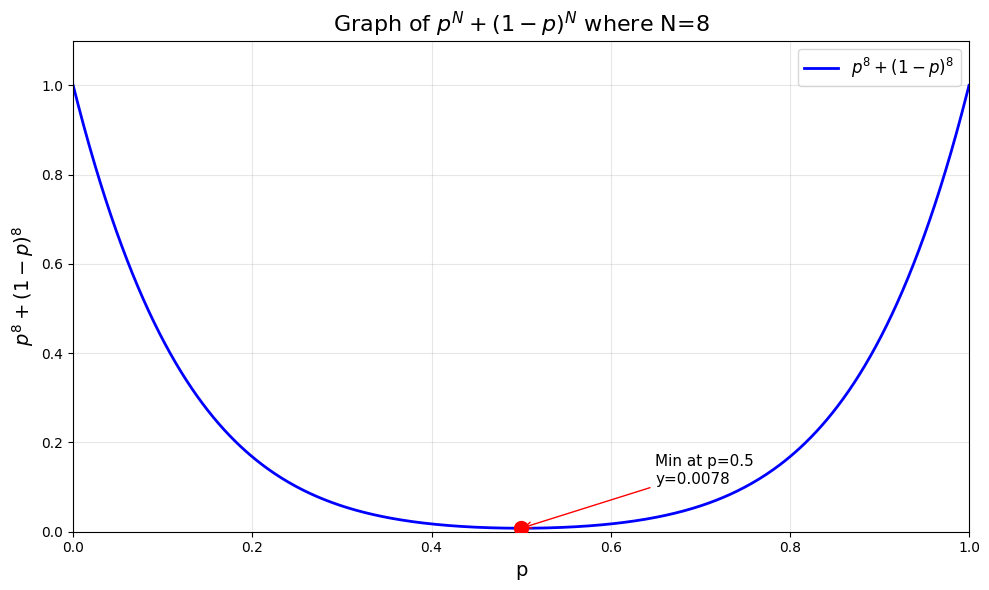

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 8
p = np.linspace(0, 1, 500)

# Function: f(p) = p^N + (1-p)^N
y = p**N + (1 - p)**N

# Plot
plt.figure(figsize=(10, 6))
plt.plot(p, y, 'b-', linewidth=2, label=f'$p^{{{N}}} + (1-p)^{{{N}}}$')
plt.xlabel('p', fontsize=14)
plt.ylabel(f'$p^{{{N}}} + (1-p)^{{{N}}}$', fontsize=14)
plt.title(f'Graph of $p^N + (1-p)^N$ where N={N}', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1.1)

# Mark minimum point at p=0.5
p_min = 0.5
y_min = p_min**N + (1 - p_min)**N
plt.scatter([p_min], [y_min], color='red', s=100, zorder=5)
plt.annotate(f'Min at p=0.5\ny={y_min:.4f}', 
             xy=(p_min, y_min), 
             xytext=(p_min + 0.15, y_min + 0.1),
             fontsize=11,
             arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

In [1]:
a = 500 + 272 + 30 + 30 + 45
b = 674

In [2]:
print(round((a * 50.87 + b * 33.29) / (a + b), 2))
print(round((a * 51.14 + b * 32.68) / (a + b), 2))
print(round((a * 47.93 + b * 28.65) / (a + b), 2))
print(round((a * 51.08 + b * 32.88) / (a + b), 2))
print(round((a * 48.63 + b * 29.41) / (a + b), 2))

43.23
43.12
39.55
43.17
40.28


In [2]:
print(round((a * 47.63 + b * 27.39) / (a + b), 2))

38.83


In [7]:
print(round(71.95 - 68.37, 2))
print(round(24.95 - 25.74, 2))
print(round(14.17 - 8.75, 2))
print(round(7.08 - 4.58, 2))
print(round(26.94 - 23.61, 2))
print(round(33.29 - 29.41, 2))
print(round(43.23 - 40.28, 2))

3.58
-0.79
5.42
2.5
3.33
3.88
2.95


In [8]:
print(round((a * 55.19 + b * 67.63) / (a + b), 2))
print(round((a * 56.34 + b * 68.24) / (a + b), 2))
print(round((a * 56.19 + b * 68.00) / (a + b), 2))
print(round((a * 56.34 + b * 68.10) / (a + b), 2))
print(round((a * 54.82 + b * 67.20) / (a + b), 2))

60.6
61.51
61.32
61.45
60.2


In [9]:
print(round(88.92 - 88.05, 2))
print(round(39.48 - 39.25, 2))
print(round(34.17 - 30.00, 2))
print(round(30.83 - 26.67, 2))
print(round(60.00 - 56.39, 2))
print(round(56.34 - 54.82, 2))
print(round(61.51 - 60.2, 2))

0.87
0.23
4.17
4.16
3.61
1.52
1.31


In [1]:
!pwd

/wbl/post-training/haechan_workspace/MLILAB-GRPO


In [3]:
def find_new(prev, curr):
    rewards = []
    
    for k, v in curr.items():
        if k in prev.keys() and len(v) == len(prev[k]):
            continue
        else:
            rewards.append(v[-1]["reward"])
            
    return rewards

def find_zvp(rewards):
    hard_zvp = 0
    easy_zvp = 0
    non_zvp = 0
    for reward in rewards:
        if sum(reward) == 0:
            hard_zvp += 1
        elif sum(reward) == len(reward):
            easy_zvp += 1
        else:
            non_zvp += 1
    
    assert len(rewards) == hard_zvp + easy_zvp + non_zvp
    return hard_zvp, easy_zvp, non_zvp
        

In [6]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt


def plot_zvp(home, exp, max_step, freq, N):
    hard_zvp_total, easy_zvp_total, total = [], [], []
    prev = dict()
    for step in range(freq, max_step + 1, freq):
        path = os.path.join(home, exp, f"id2score_step_{step}.json")
        with open(path, "r") as f:
            curr = json.load(f)
            
        new_rewards = find_new(prev, curr)
        hard_zvp, easy_zvp, non_zvp = find_zvp(new_rewards)
        hard_zvp_total.append(hard_zvp)
        easy_zvp_total.append(easy_zvp)
        total.append(len(new_rewards))
        
        prev = curr


    steps = range(freq, max_step + 1, freq)
    # N = 640  # 전체 개수 (비율 계산용)

    fig, ax1 = plt.subplots()

    # -----------------------------
    # 왼쪽 y축: Number of ZVP (실제 그래프)
    # -----------------------------
    line1, = ax1.plot(steps, hard_zvp_total, 'b-', label="hard ZVP")
    line2, = ax1.plot(steps, easy_zvp_total, 'r-', label="easy ZVP")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Number of ZVP")
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # -----------------------------
    # 오른쪽 y축: Proportion 눈금만 표시 (그래프는 없음)
    # -----------------------------
    ax2 = ax1.twinx()
    ax2.set_ylabel("Proportion of ZVP")

    # 왼쪽 축 범위를 가져와 비율로 변환한 tick 표시
    ymin, ymax = ax1.get_ylim()
    ax2.set_ylim(ymin / N, ymax / N)
    ax2.tick_params(axis='y')

    plt.title("Analysis of ZVP of GRPO")
    plt.grid(True)
    plt.show()

    print((hard_zvp_total[-1] + easy_zvp_total[-1]) / N)


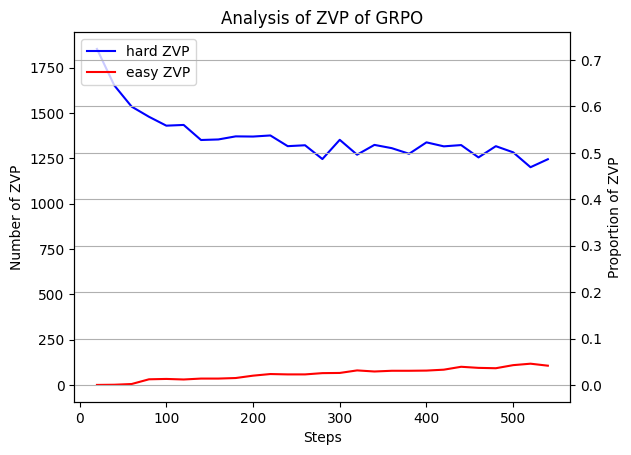

0.528125


In [3]:
plot_zvp(home="/wbl/post-training/haechan_workspace/MLILAB-GRPO/models",
         exp="qwen3-grpo-paper-dapo17k-batch128-cliph0_2-clipl0_28-clipc3-nokl-lr1e-6-again",
         max_step=540, 
         freq=20,
         N=128 * 20)

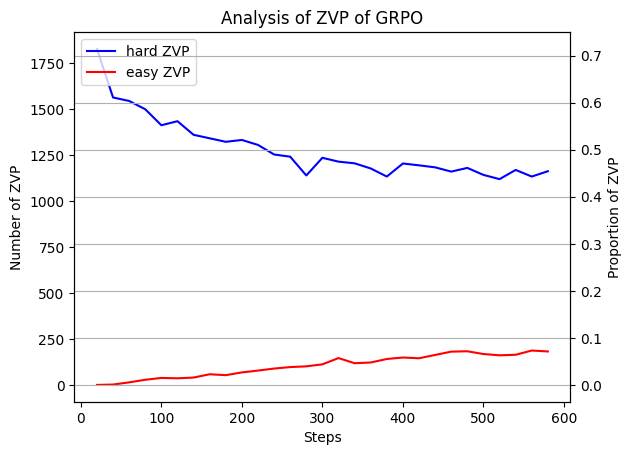

0.52578125


In [4]:
plot_zvp(home="/wbl/post-training/haechan_workspace/MLILAB-GRPO/models",
         exp="qwen3-grpohistbeta-paper-dapo17k-batch128-cliph1_0-clipl1_0-clipc10-nokl-lr1e-6-again",
         max_step=595, 
         freq=20,
         N=128 * 20)

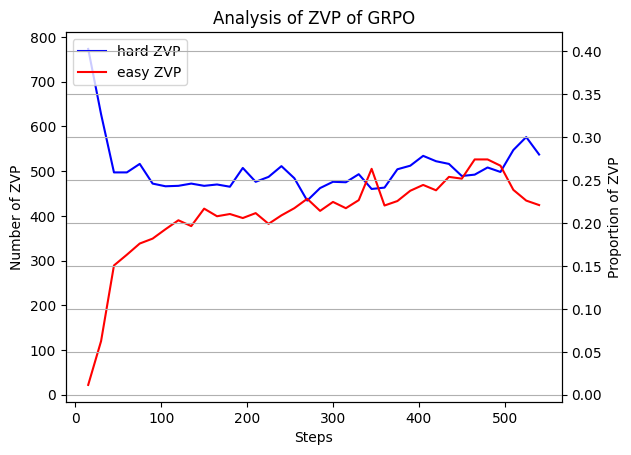

0.5005208333333333


In [7]:
plot_zvp(home="/wbl/post-training/haechan_workspace/MLILAB-GRPO/models",
         exp="qwen3-8b-grpo-paper-batch128-cliph0_28-clipl0_2-clipc3-nokl-lr1e-6-again",
         max_step=540, 
         freq=15,
         N=128 * 15)

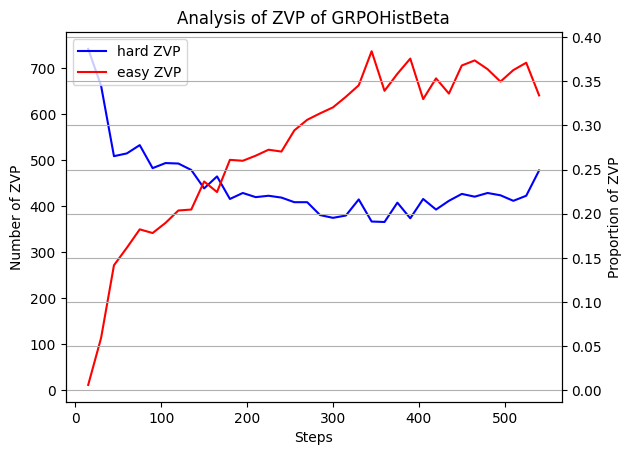

0.5828125


In [9]:
plot_zvp(home="/wbl/post-training/haechan_workspace/MLILAB-GRPO/models",
         exp="qwen3-8b-grpohistbeta-paper-batch128-cliph1_0-clipl1_0-clipc10-nokl-lr1e-6",
         max_step=540, 
         freq=15,
         N=128 * 15)

Beta normalization의 정량적 분석

In [8]:
import numpy as np

base_cases = [
    np.array([1, 1, 1, 1, 1, 1, 1, 1]),
    np.array([0, 1, 1, 1, 1, 1, 1, 1]),
    np.array([0, 0, 1, 1, 1, 1, 1, 1]),
    np.array([0, 0, 0, 1, 1, 1, 1, 1]),
    np.array([0, 0, 0, 0, 1, 1, 1, 1]),
    np.array([0, 0, 0, 0, 0, 1, 1, 1]),
    np.array([0, 0, 0, 0, 0, 0, 1, 1]),
    np.array([0, 0, 0, 0, 0, 0, 0, 1]),
    np.array([0, 0, 0, 0, 0, 0, 0, 0]),
]

In [22]:
import os
import json
import itertools

def get_id2score(exp):
    assert exp in ["grpo", "grpohistbeta", "MATH"]
    
    home = "/wbl/post-training/haechan_workspace/MLILAB-GRPO/models"
    if exp == "grpo":
        exp = "qwen3-grpo-paper-dapo17k-batch128-cliph0_2-clipl0_28-clipc3-nokl-lr1e-6-again/id2score_step_540.json"
    elif exp == "grpohistbeta":
        exp = "qwen3-grpohistbeta-paper-dapo17k-batch128-cliph1_0-clipl1_0-clipc10-nokl-lr1e-6-again/id2score_step_540.json"
    elif exp == "MATH":
        exp = "qwen3-grpohistbeta-paper-batch128-cliph1_0-clipl1_0-clipc10-nokl-lr1e-6/id2score_step_235.json"
    
    path = os.path.join(home, exp)
    with open(path, "r") as f:
        curr = json.load(f)

    if exp in ["grpo", "grpohistbeta"]:
        assert len(curr.keys()) == 17280
        for k, v in curr.items():
            assert len(v) == 4
    
    if exp == "MATH":
        assert len(curr.keys()) == 7424
        for k, v in curr.items():
            assert len(v) in [4, 5]
    
    return curr

def id2score_to_cases(id2score, epoch):
    cases = []
    for v in id2score.values():
        case = []
        for e in range(epoch):
            assert v[e]["epoch"] == e + 1
            case.append(sum(v[e]["reward"]))
        cases.append(np.array(case))
    
    if len(cases) == 7424 or len(cases) == 17280:
        return cases
    else:
        raise ValueError(f"Invalid number of cases: {len(cases)}")

def get_all_cases(epoch):
    all_cases = list(itertools.product(base_cases, repeat=epoch))
    all_cases_alpha = [np.array(case).sum(axis=1) for case in all_cases]
    return all_cases_alpha


def count_cases(cases):
    epoch = len(cases[0])
    assert all(len(case) == epoch for case in cases)
    
    all_cases = get_all_cases(epoch)

    counts = [0] * len(all_cases)
    for case in cases:
        for i, c in enumerate(all_cases):
            if (case == c).all():
                counts[i] += 1
                break
    
    assert sum(counts) == len(cases)
    assert len(all_cases) == len(counts)
    return all_cases, counts

def compute_advantage(cases, discount_factor, init_const=1.0):
    # index -1 is the latest case
    alpha = init_const
    beta = init_const
    for case in cases:
        alpha = alpha * discount_factor + case
        beta = beta * discount_factor + 8 - case

    mean = alpha / (alpha + beta + np.finfo(float).eps)
    std = np.sqrt((alpha * beta) / ((alpha + beta + np.finfo(float).eps) ** 2)) 
    advantage_correct = (1 - mean) / (std + np.finfo(float).eps)
    advantage_incorrect = (0 - mean) / (std + np.finfo(float).eps)
    if cases[-1] == 0:
        return None, advantage_incorrect
    elif 8 - cases[-1] == 0:
        return advantage_correct, None
    else:
        return advantage_correct, advantage_incorrect

# def compute_advantage_gap(cases, adv_corr_grpo, adv_incorr_grpo, adv_corr_grpohist, adv_incorr_grpohist):
#     num_correct = cases[-1]
#     num_incorrect = 8 - num_correct
#     gap_corr = adv_corr_grpo - adv_corr_grpohist
#     gap_incorr = adv_incorr_grpo - adv_incorr_grpohist
#     return gap_corr, gap_incorr


In [23]:
exp = "MATH"
id2score = get_id2score(exp)
cases = id2score_to_cases(id2score, 2)
all_cases, counts = count_cases(cases)

# 표 헤더 출력
print(f"{'':^10} | {'':^8} |{'GRPO':^25}|{'Beta':^25}")
print(f"{'Case':^10} | {'Count':^8} | {'Correct':^10} | {'Incorrect':^10} | {'Correct':^10} | {'Incorrect':^10}")
print("-" * 82)

for c, count in zip(all_cases, counts):
    # GRPO (discount_factor=0)
    adv_corr_grpo, adv_incorr_grpo = compute_advantage(c, 0)
    corr_grpo = f"{adv_corr_grpo:+.3f}" if adv_corr_grpo is not None else "  None"
    incorr_grpo = f"{adv_incorr_grpo:+.3f}" if adv_incorr_grpo is not None else "  None"
    
    # Beta (discount_factor=1)
    adv_corr_grpohist, adv_incorr_grpohist = compute_advantage(c, 1)
    corr_grpohist = f"{adv_corr_grpohist:+.3f}" if adv_corr_grpohist is not None else "  None"
    incorr_grpohist = f"{adv_incorr_grpohist:+.3f}" if adv_incorr_grpohist is not None else "  None"
    
    print(f"{str(c):^10} | {count:^8} | {corr_grpo:^10} | {incorr_grpo:^10} | {corr_grpohist:^10} | {incorr_grpohist:^10}")

           |          |          GRPO           |          Beta           
   Case    |  Count   |  Correct   | Incorrect  |  Correct   | Incorrect 
----------------------------------------------------------------------------------
  [8 8]    |   1519   |   +0.000   |     None   |   +0.243   |     None  
  [8 7]    |   169    |   +0.378   |   -2.646   |   +0.354   |   -2.828  
  [8 6]    |    44    |   +0.577   |   -1.732   |   +0.447   |   -2.236  
  [8 5]    |    10    |   +0.775   |   -1.291   |   +0.535   |   -1.871  
  [8 4]    |    5     |   +1.000   |   -1.000   |   +0.620   |   -1.612  
  [8 3]    |    0     |   +1.291   |   -0.775   |   +0.707   |   -1.414  
  [8 2]    |    0     |   +1.732   |   -0.577   |   +0.798   |   -1.254  
  [8 1]    |    0     |   +2.646   |   -0.378   |   +0.894   |   -1.118  
  [8 0]    |    0     |     None   |   +0.000   |     None   |   -1.000  
  [7 8]    |   680    |   +0.000   |     None   |   +0.354   |     None  
  [7 7]    |   175    |   +0

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_advantage_comparison(max_history=4, distribution="theoretical"):
    """
    GRPO vs GRPOHist의 advantage 비교 시각화
    - GRPO: discount_factor=0 (마지막 case만 사용)
    - GRPOHist: discount_factor=1 (전체 history 사용)
    """
    assert distribution in ["theoretical", "grpo", "grpohistbeta", "MATH"]
    
    fig, axes = plt.subplots(2, max_history, figsize=(4*max_history, 8))
    fig.suptitle(f'GRPO vs GRPOHist Advantage Comparison ({distribution if distribution != "grpohistbeta" else "DAPO"})', fontsize=14, fontweight='bold')
    
    for hist_len in range(1, max_history + 1):
        col = hist_len - 1
        
        if distribution == "theoretical":
            all_cases = get_all_cases(hist_len)
        else:
            id2score = get_id2score(distribution)
            all_cases = id2score_to_cases(id2score, hist_len)
        
        # 데이터 수집
        grpo_correct, grpo_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        hist_correct, hist_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        count_per_current = {i: 0 for i in range(9)}  # 각 current correct count별 개수
        
        for case in all_cases:
            current_val = case[-1]  # 마지막 epoch의 정답 수
            count_per_current[current_val] += 1  # 개수 카운트
            
            # GRPO (discount_factor=0)
            adv_corr_grpo, adv_incorr_grpo = compute_advantage(case, 0)
            if adv_corr_grpo is not None:
                grpo_correct[current_val].append(adv_corr_grpo)
            if adv_incorr_grpo is not None:
                grpo_incorrect[current_val].append(adv_incorr_grpo)
            
            # GRPOHist (discount_factor=1)
            adv_corr_hist, adv_incorr_hist = compute_advantage(case, 1)
            if adv_corr_hist is not None:
                hist_correct[current_val].append(adv_corr_hist)
            if adv_incorr_hist is not None:
                hist_incorrect[current_val].append(adv_incorr_hist)
        
        # 비율 계산
        total = sum(count_per_current.values())
        ratios = [count_per_current[i] / total * 100 if total > 0 else 0 for i in range(9)]
        
        # Correct Advantage (상단 행)
        ax_corr = axes[0, col]
        for x in range(9):
            # GRPO - 단일 값이므로 큰 마커
            if grpo_correct[x]:
                ax_corr.scatter([x], [grpo_correct[x][0]], c='blue', s=100, marker='o', 
                               label='GRPO' if x == 0 else '', zorder=3, edgecolors='darkblue', linewidths=1)
            # GRPOHist - 분포를 보여주기 위해 작은 마커 + jitter
            if hist_correct[x]:
                jitter = np.random.uniform(-0.15, 0.15, len(hist_correct[x]))
                ax_corr.scatter(x + jitter, hist_correct[x], c='red', s=20, alpha=0.5, marker='x',
                               label='GRPOHist' if x == 0 else '', zorder=2)
                # 평균값 표시
                ax_corr.scatter([x], [np.mean(hist_correct[x])], c='darkred', s=80, marker='D', 
                               edgecolors='black', linewidths=1, zorder=4)
        
        ax_corr.set_xlabel('Current Correct Count')
        ax_corr.set_ylabel('Correct Advantage')
        ax_corr.set_title(f'History Length = {hist_len}')
        ax_corr.set_xticks(range(9))
        ax_corr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_corr.grid(True, alpha=0.3)
        if col == 0:
            ax_corr.legend(loc='upper left')
        
        # x축 아래에 비율 bar 추가 (x축 label로 표현)
        ratio_labels = [f'{i}\n({ratios[i]:.0f}%)' for i in range(9)]
        ax_corr.set_xticklabels(ratio_labels, fontsize=8)
        
        # Incorrect Advantage (하단 행)
        ax_incorr = axes[1, col]
        for x in range(9):
            # GRPO
            if grpo_incorrect[x]:
                ax_incorr.scatter([x], [grpo_incorrect[x][0]], c='blue', s=100, marker='o',
                                 label='GRPO' if x == 0 else '', zorder=3, edgecolors='darkblue', linewidths=1)
            # GRPOHist
            if hist_incorrect[x]:
                jitter = np.random.uniform(-0.15, 0.15, len(hist_incorrect[x]))
                ax_incorr.scatter(x + jitter, hist_incorrect[x], c='red', s=20, alpha=0.5, marker='x',
                                 label='GRPOHist' if x == 0 else '', zorder=2)
                ax_incorr.scatter([x], [np.mean(hist_incorrect[x])], c='darkred', s=80, marker='D',
                                 edgecolors='black', linewidths=1, zorder=4)
        
        ax_incorr.set_xlabel('Current Correct Count')
        ax_incorr.set_ylabel('Incorrect Advantage')
        ax_incorr.set_xticks(range(9))
        ax_incorr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_incorr.grid(True, alpha=0.3)
        if col == 0:
            ax_incorr.legend(loc='lower left')
        
        # x축 아래에 비율 표시
        ax_incorr.set_xticklabels(ratio_labels, fontsize=8)
        
    
    plt.tight_layout()
    plt.savefig('advantage_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nLegend:")
    print("  ● Blue circle: GRPO (only uses current case)")
    print("  × Red cross: GRPOHist individual cases (uses full history)")
    print("  ◆ Dark red diamond: GRPOHist mean")


/tmp/ipykernel_3912241/3717963601.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_corr.legend(loc='upper left')


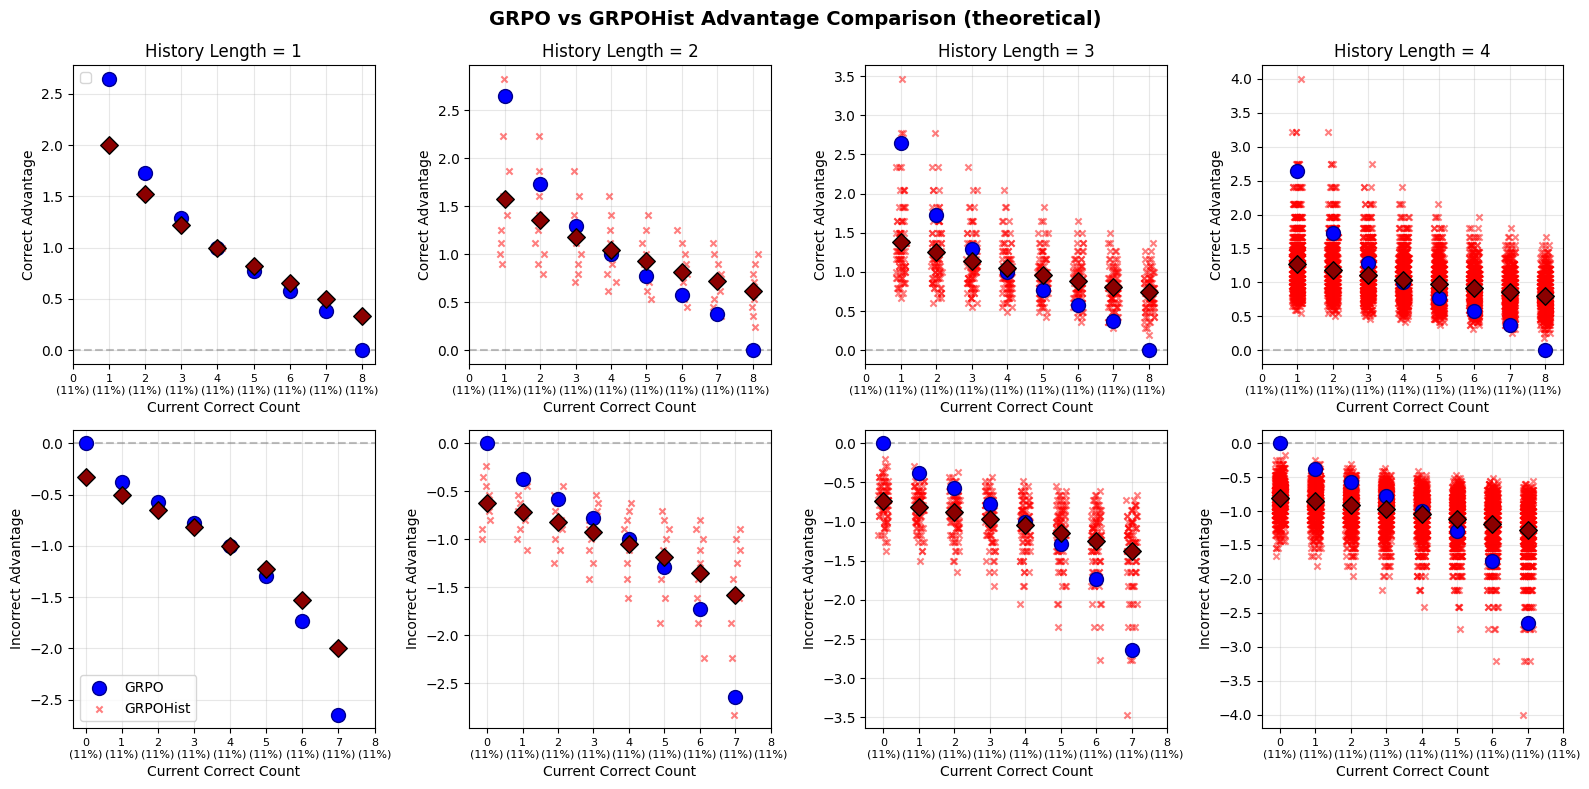


Legend:
  ● Blue circle: GRPO (only uses current case)
  × Red cross: GRPOHist individual cases (uses full history)
  ◆ Dark red diamond: GRPOHist mean


In [25]:
visualize_advantage_comparison(max_history=4, distribution="theoretical")

/tmp/ipykernel_3912241/3717963601.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_corr.legend(loc='upper left')


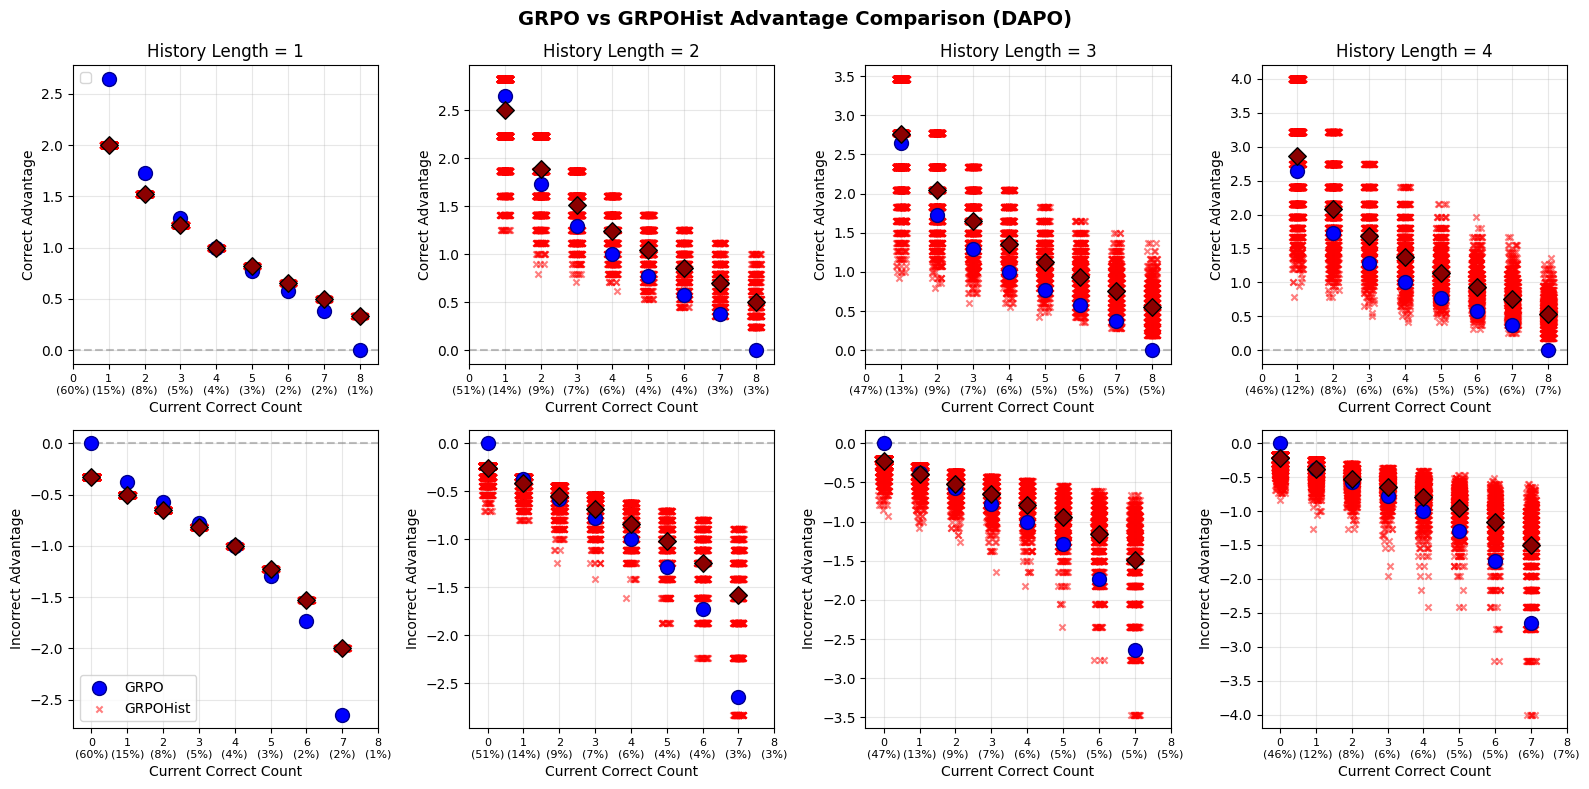


Legend:
  ● Blue circle: GRPO (only uses current case)
  × Red cross: GRPOHist individual cases (uses full history)
  ◆ Dark red diamond: GRPOHist mean


In [26]:
visualize_advantage_comparison(max_history=4, distribution="grpohistbeta")

/tmp/ipykernel_3912241/3717963601.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_corr.legend(loc='upper left')


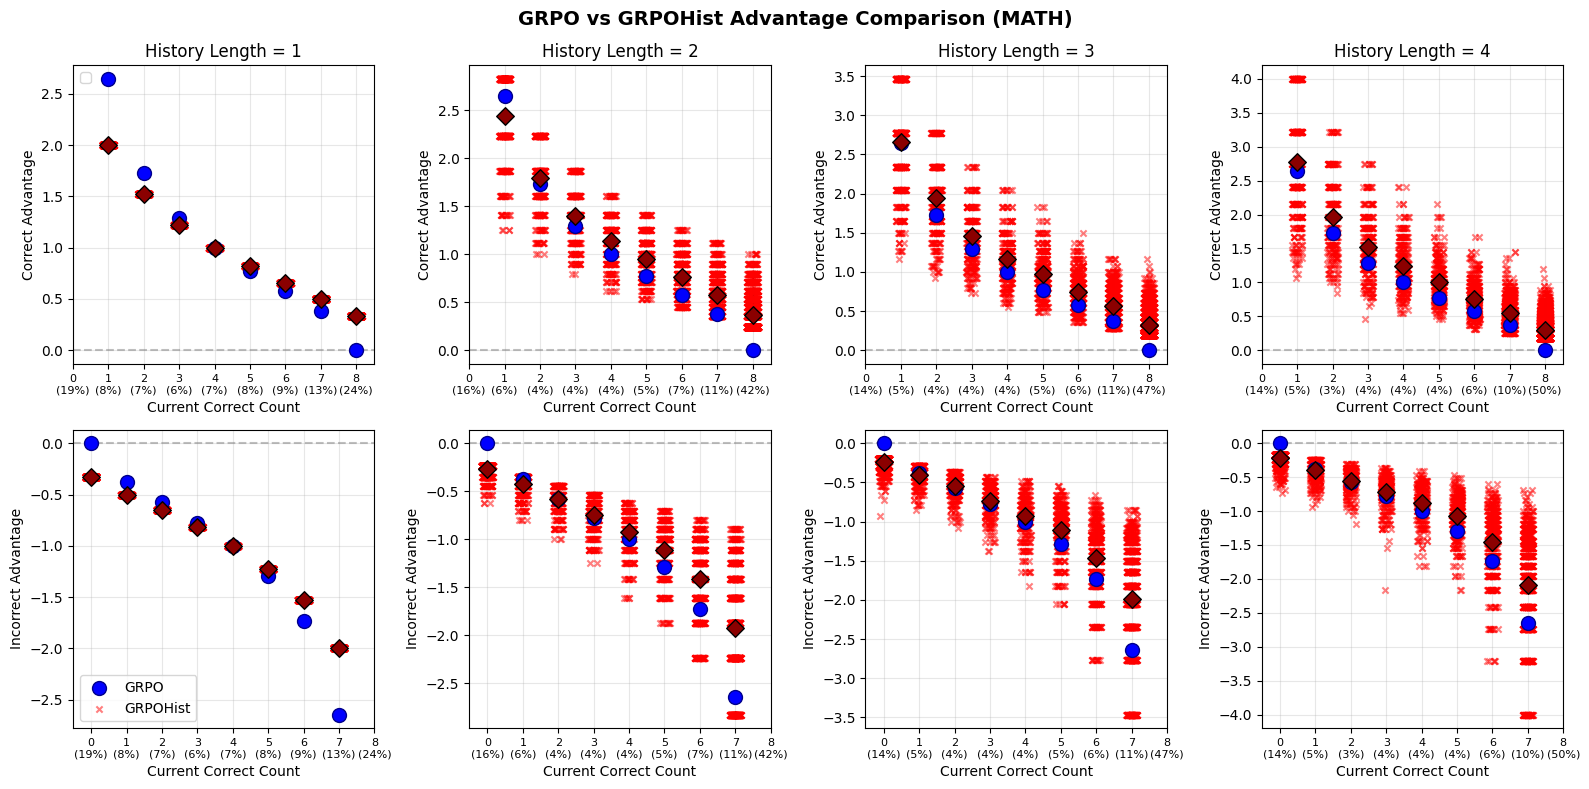


Legend:
  ● Blue circle: GRPO (only uses current case)
  × Red cross: GRPOHist individual cases (uses full history)
  ◆ Dark red diamond: GRPOHist mean


In [27]:
visualize_advantage_comparison(max_history=4, distribution="MATH")

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_advantage_comparison_with_cases(max_history=4, distribution="theoretical"):
    """
    GRPO vs GRPOHist의 advantage 비교 시각화 (새로운 Case 분류)
    
    ** Correct **
    - Case1: current correct count=8 (모두 맞음, correct advantage 존재 X)
    - Case2: GRPOHist advantage < GRPO advantage (GRPO보다 낮음)
    - Case3: Case1 제외, GRPOHist advantage > GRPO advantage (GRPO보다 높음)
    
    ** Incorrect **
    - Case1: current correct count=0 (모두 틀림, incorrect advantage 존재 X)
    - Case2: GRPOHist advantage > GRPO advantage (GRPO보다 높음 = 페널티 감소)
    - Case3: Case1 제외, GRPOHist advantage < GRPO advantage (GRPO보다 낮음 = 페널티 증가)
    """
    assert distribution in ["theoretical", "grpo", "grpohistbeta", "MATH"]
    
    fig, axes = plt.subplots(2, max_history, figsize=(4*max_history, 8))
    fig.suptitle(f'GRPO vs GRPOHist Advantage Comparison ({distribution if distribution != "grpohistbeta" else "DAPO"})', fontsize=14, fontweight='bold')
    
    for hist_len in range(1, max_history + 1):
        col = hist_len - 1
        
        if distribution == "theoretical":
            all_cases = get_all_cases(hist_len)
        else:
            id2score = get_id2score(distribution)
            all_cases = id2score_to_cases(id2score, hist_len)
        
        # 데이터 수집
        grpo_correct, grpo_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        hist_correct, hist_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        count_per_current = {i: 0 for i in range(9)}
        
        for case in all_cases:
            current_val = case[-1]
            count_per_current[current_val] += 1
            
            adv_corr_grpo, adv_incorr_grpo = compute_advantage(case, 0)
            if adv_corr_grpo is not None:
                grpo_correct[current_val].append(adv_corr_grpo)
            if adv_incorr_grpo is not None:
                grpo_incorrect[current_val].append(adv_incorr_grpo)
            
            adv_corr_hist, adv_incorr_hist = compute_advantage(case, 1)
            if adv_corr_hist is not None:
                hist_correct[current_val].append(adv_corr_hist)
            if adv_incorr_hist is not None:
                hist_incorrect[current_val].append(adv_incorr_hist)
        
        # 비율 계산
        total = sum(count_per_current.values())
        ratios = [count_per_current[i] / total * 100 if total > 0 else 0 for i in range(9)]
        
        # ========== Correct Advantage Case 분류 ==========
        case_corr = {"C1": 0, "C2": 0, "C3": 0}
        total_corr = 0
        for case in all_cases:
            current_val = case[-1]
            adv_grpo, _ = compute_advantage(case, 0)
            adv_hist, _ = compute_advantage(case, 1)
            
            # Case1: current=8 (correct advantage 없음)
            if current_val == 8:
                case_corr["C1"] += 1
                total_corr += 1
                continue
            
            if adv_grpo is None or adv_hist is None:
                total_corr += 1
                continue
            
            total_corr += 1
            # Case2: GRPOHist < GRPO
            if adv_hist < adv_grpo:
                case_corr["C2"] += 1
            # Case3: GRPOHist > GRPO (Case1 제외)
            else:
                case_corr["C3"] += 1
        
        # Correct Advantage (상단 행)
        ax_corr = axes[0, col]
        
        for x in range(9):
            if grpo_correct[x]:
                ax_corr.scatter([x], [grpo_correct[x][0]], c='blue', s=100, marker='o', 
                               label='GRPO' if x == 0 else '', zorder=5, edgecolors='darkblue', linewidths=1)
            if hist_correct[x]:
                jitter = np.random.uniform(-0.15, 0.15, len(hist_correct[x]))
                ax_corr.scatter(x + jitter, hist_correct[x], c='red', s=20, alpha=0.5, marker='x',
                               label='GRPOHist' if x == 0 else '', zorder=4)
                ax_corr.scatter([x], [np.mean(hist_correct[x])], c='darkred', s=80, marker='D', 
                               edgecolors='black', linewidths=1, zorder=6)
        
        ax_corr.set_xticks(range(9))
        ax_corr.axhline(y=0, color='gray', linestyle='--', alpha=0.5, zorder=3)
        
        ymin, ymax = ax_corr.get_ylim()
        
        # Case 영역 색칠
        # Case1 영역 (x=8)
        ax_corr.axvspan(7.5, 8.5, ymin=0, ymax=1, alpha=0.15, color='gray', zorder=1)
        # Case2, Case3 영역 (x < 8)
        ax_corr.axvspan(-0.5, 7.5, ymin=0, ymax=1, alpha=0.05, color='yellow', zorder=1)
        
        # 수직 구분선 (x=8 기준)
        ax_corr.axvline(x=7.5, color='black', linestyle='-', alpha=0.3, linewidth=2, zorder=2)
        
        # Case % 표시
        c1_pct = case_corr["C1"] / total_corr * 100 if total_corr > 0 else 0
        c2_pct = case_corr["C2"] / total_corr * 100 if total_corr > 0 else 0
        c3_pct = case_corr["C3"] / total_corr * 100 if total_corr > 0 else 0
        
        # 텍스트 위치
        y_top = ymax - (ymax - ymin) * 0.05
        y_mid = (ymax + ymin) / 2
        
        # Case1 (x=8, 회색 영역)
        ax_corr.text(8, y_top, f'C1\n{c1_pct:.0f}%', fontsize=9, fontweight='bold', ha='center', color='dimgray', zorder=10)
        # Case2, Case3 표시 (좌측 상단에 표로 표시)
        ax_corr.text(0.02, 0.98, f'C2 (Hist<GRPO): {c2_pct:.1f}%\nC3 (Hist>GRPO): {c3_pct:.1f}%', 
                    transform=ax_corr.transAxes, fontsize=9, fontweight='bold', 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), zorder=10)
        
        ax_corr.set_xlabel('Current Correct Count')
        ax_corr.set_ylabel('Correct Advantage')
        ax_corr.set_title(f'History Length = {hist_len}')
        ax_corr.grid(True, alpha=0.3, zorder=2)
        if col == 0:
            ax_corr.legend(loc='upper right')
        
        ratio_labels = [f'{i}\n({ratios[i]:.0f}%)' for i in range(9)]
        ax_corr.set_xticklabels(ratio_labels, fontsize=8)
        
        # ========== Incorrect Advantage Case 분류 ==========
        case_incorr = {"C1": 0, "C2": 0, "C3": 0}
        total_incorr = 0
        for case in all_cases:
            current_val = case[-1]
            _, adv_grpo = compute_advantage(case, 0)
            _, adv_hist = compute_advantage(case, 1)
            
            # Case1: current=0 (incorrect advantage 없음)
            if current_val == 0:
                case_incorr["C1"] += 1
                total_incorr += 1
                continue
            
            if adv_grpo is None or adv_hist is None:
                total_incorr += 1
                continue
            
            total_incorr += 1
            # Case2: GRPOHist > GRPO (페널티 감소)
            if adv_hist > adv_grpo:
                case_incorr["C2"] += 1
            # Case3: GRPOHist < GRPO (페널티 증가)
            else:
                case_incorr["C3"] += 1
        
        # Incorrect Advantage (하단 행)
        ax_incorr = axes[1, col]
        
        for x in range(9):
            if grpo_incorrect[x]:
                ax_incorr.scatter([x], [grpo_incorrect[x][0]], c='blue', s=100, marker='o',
                                 label='GRPO' if x == 0 else '', zorder=5, edgecolors='darkblue', linewidths=1)
            if hist_incorrect[x]:
                jitter = np.random.uniform(-0.15, 0.15, len(hist_incorrect[x]))
                ax_incorr.scatter(x + jitter, hist_incorrect[x], c='red', s=20, alpha=0.5, marker='x',
                                 label='GRPOHist' if x == 0 else '', zorder=4)
                ax_incorr.scatter([x], [np.mean(hist_incorrect[x])], c='darkred', s=80, marker='D',
                                 edgecolors='black', linewidths=1, zorder=6)
        
        ax_incorr.set_xticks(range(9))
        ax_incorr.axhline(y=0, color='gray', linestyle='--', alpha=0.5, zorder=3)
        
        ymin_i, ymax_i = ax_incorr.get_ylim()
        
        # Case 영역 색칠
        # Case1 영역 (x=0)
        ax_incorr.axvspan(-0.5, 0.5, ymin=0, ymax=1, alpha=0.15, color='gray', zorder=1)
        # Case2, Case3 영역 (x > 0)
        ax_incorr.axvspan(0.5, 8.5, ymin=0, ymax=1, alpha=0.05, color='yellow', zorder=1)
        
        # 수직 구분선 (x=0 기준)
        ax_incorr.axvline(x=0.5, color='black', linestyle='-', alpha=0.3, linewidth=2, zorder=2)
        
        # Case % 표시
        c1i_pct = case_incorr["C1"] / total_incorr * 100 if total_incorr > 0 else 0
        c2i_pct = case_incorr["C2"] / total_incorr * 100 if total_incorr > 0 else 0
        c3i_pct = case_incorr["C3"] / total_incorr * 100 if total_incorr > 0 else 0
        
        y_bot_i = ymin_i + (ymax_i - ymin_i) * 0.05
        
        # Case1 (x=0, 회색 영역)
        ax_incorr.text(0, y_bot_i, f'C1\n{c1i_pct:.0f}%', fontsize=9, fontweight='bold', ha='center', color='dimgray', zorder=10)
        # Case2, Case3 표시
        ax_incorr.text(0.98, 0.02, f'C2 (Hist>GRPO): {c2i_pct:.1f}%\nC3 (Hist<GRPO): {c3i_pct:.1f}%', 
                      transform=ax_incorr.transAxes, fontsize=9, fontweight='bold', 
                      verticalalignment='bottom', horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), zorder=10)
        
        ax_incorr.set_xlabel('Current Correct Count')
        ax_incorr.set_ylabel('Incorrect Advantage')
        ax_incorr.grid(True, alpha=0.3, zorder=2)
        if col == 0:
            ax_incorr.legend(loc='lower right')
        
        ax_incorr.set_xticklabels(ratio_labels, fontsize=8)
    
    plt.tight_layout()
    plt.savefig('advantage_comparison_cases.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n=== Case 분류 설명 ===")
    print("\n[Correct Advantage]")
    print("  C1 (회색): current=8 → 모두 맞아서 correct advantage 계산 대상 없음")
    print("  C2: GRPOHist < GRPO → history 사용 시 correct에 대한 보상 감소")
    print("  C3: GRPOHist > GRPO → history 사용 시 correct에 대한 보상 증가")
    print("\n[Incorrect Advantage]")
    print("  C1 (회색): current=0 → 모두 틀려서 incorrect advantage 계산 대상 없음")
    print("  C2: GRPOHist > GRPO → history 사용 시 incorrect에 대한 페널티 감소 (덜 벌함)")
    print("  C3: GRPOHist < GRPO → history 사용 시 incorrect에 대한 페널티 증가 (더 벌함)")


/tmp/ipykernel_3912241/2415589119.py:132: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_corr.legend(loc='upper right')


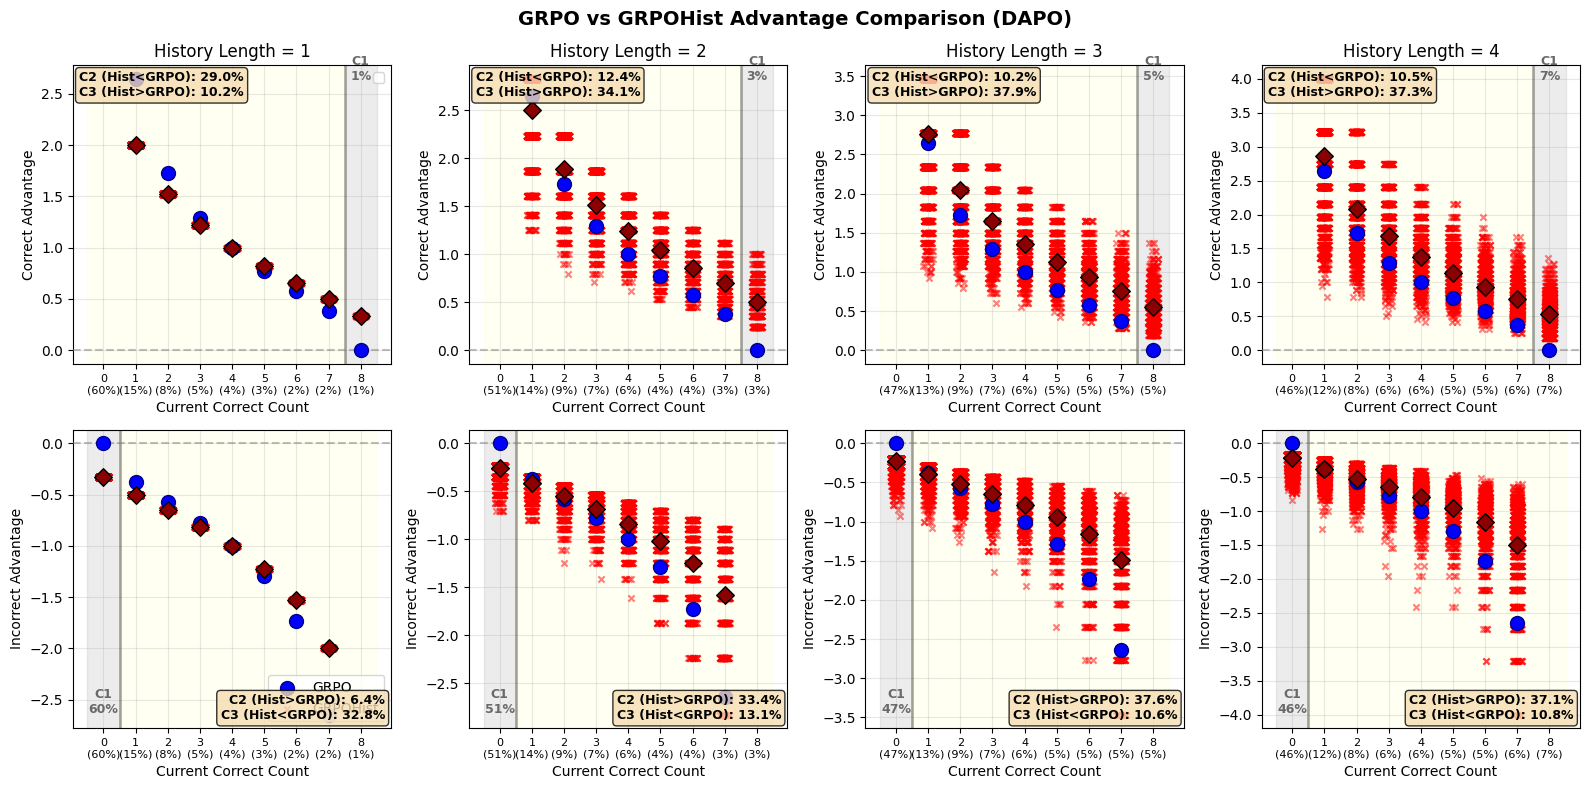


=== Case 분류 설명 ===

[Correct Advantage]
  C1 (회색): current=8 → 모두 맞아서 correct advantage 계산 대상 없음
  C2: GRPOHist < GRPO → history 사용 시 correct에 대한 보상 감소
  C3: GRPOHist > GRPO → history 사용 시 correct에 대한 보상 증가

[Incorrect Advantage]
  C1 (회색): current=0 → 모두 틀려서 incorrect advantage 계산 대상 없음
  C2: GRPOHist > GRPO → history 사용 시 incorrect에 대한 페널티 감소 (덜 벌함)
  C3: GRPOHist < GRPO → history 사용 시 incorrect에 대한 페널티 증가 (더 벌함)


In [29]:
visualize_advantage_comparison_with_cases(max_history=4, distribution="grpohistbeta")

/tmp/ipykernel_3912241/2415589119.py:132: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_corr.legend(loc='upper right')


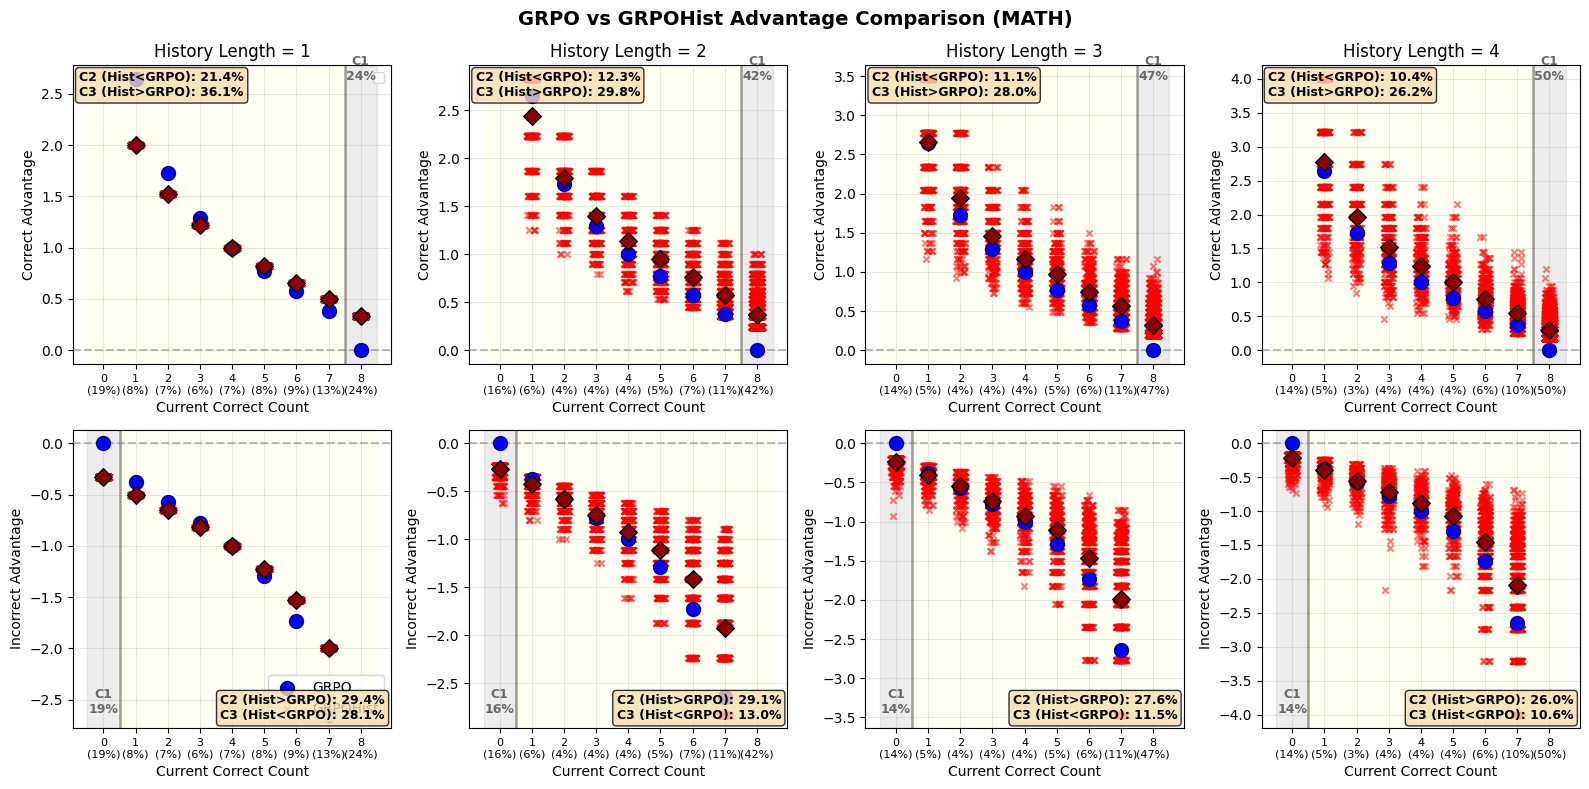


=== Case 분류 설명 ===

[Correct Advantage]
  C1 (회색): current=8 → 모두 맞아서 correct advantage 계산 대상 없음
  C2: GRPOHist < GRPO → history 사용 시 correct에 대한 보상 감소
  C3: GRPOHist > GRPO → history 사용 시 correct에 대한 보상 증가

[Incorrect Advantage]
  C1 (회색): current=0 → 모두 틀려서 incorrect advantage 계산 대상 없음
  C2: GRPOHist > GRPO → history 사용 시 incorrect에 대한 페널티 감소 (덜 벌함)
  C3: GRPOHist < GRPO → history 사용 시 incorrect에 대한 페널티 증가 (더 벌함)


In [30]:
visualize_advantage_comparison_with_cases(max_history=4, distribution="MATH")

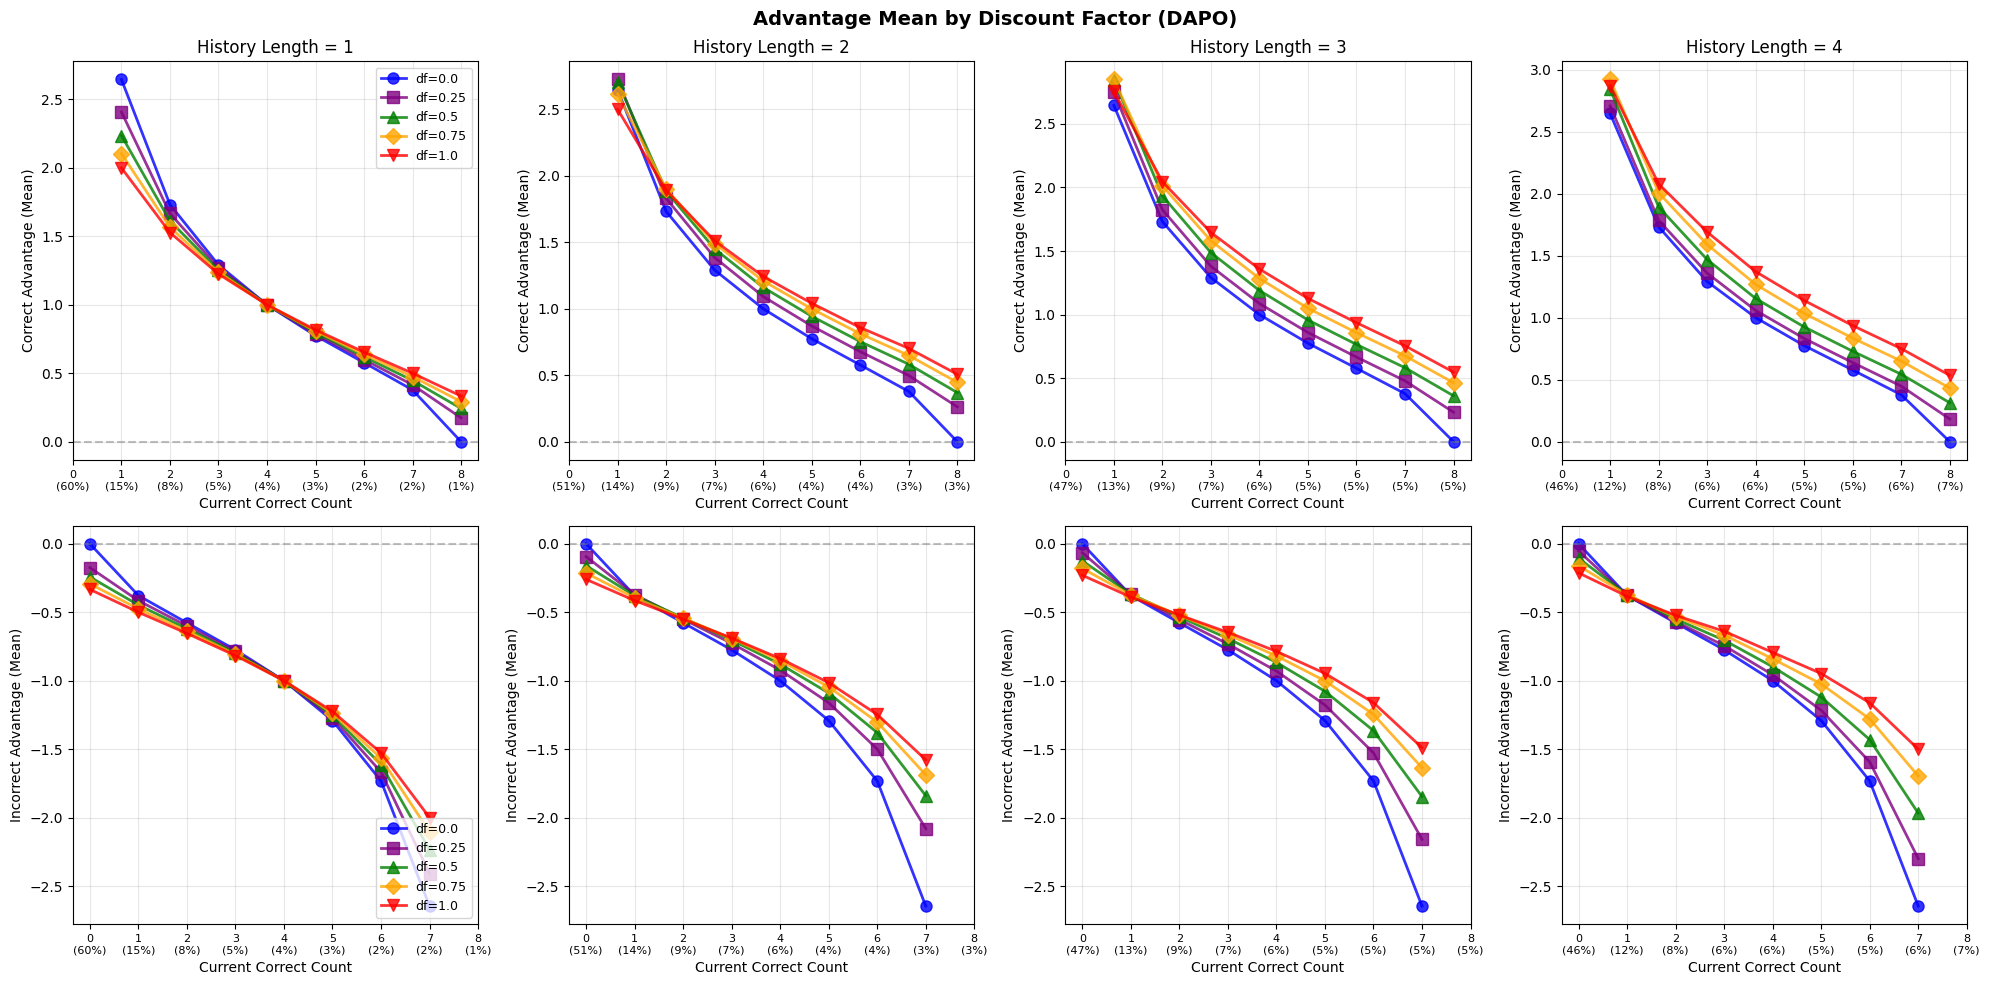


Discount Factor 의미:
  df=0.0 (파랑): GRPO - 현재 case만 사용
  df=0.25~0.75: 중간 단계 - 과거 history 부분 반영
  df=1.0 (빨강): GRPOHist - 전체 history 동등 가중


In [31]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_discount_factor_sweep(max_history=4, distribution="grpohistbeta"):
    """
    Discount Factor에 따른 advantage mean 변화 시각화
    - discount_factor: 0.0, 0.25, 0.5, 0.75, 1.0
    """
    discount_factors = [0.0, 0.25, 0.5, 0.75, 1.0]
    colors = ['blue', 'purple', 'green', 'orange', 'red']
    markers = ['o', 's', '^', 'D', 'v']
    
    fig, axes = plt.subplots(2, max_history, figsize=(5*max_history, 10))
    fig.suptitle(f'Advantage Mean by Discount Factor ({distribution if distribution != "grpohistbeta" else "DAPO"})', 
                 fontsize=14, fontweight='bold')
    
    id2score = get_id2score(distribution)
    
    for hist_len in range(1, max_history + 1):
        col = hist_len - 1
        cases = id2score_to_cases(id2score, hist_len)
        
        # 비율 계산용
        count_per_current = {i: 0 for i in range(9)}
        for case in cases:
            count_per_current[case[-1]] += 1
        total = sum(count_per_current.values())
        ratios = [count_per_current[i] / total * 100 if total > 0 else 0 for i in range(9)]
        
        # 각 discount factor별 데이터 수집
        all_means_corr = {df: {i: [] for i in range(9)} for df in discount_factors}
        all_means_incorr = {df: {i: [] for i in range(9)} for df in discount_factors}
        
        for case in cases:
            current_val = case[-1]
            for df in discount_factors:
                adv_corr, adv_incorr = compute_advantage(case, df)
                if adv_corr is not None:
                    all_means_corr[df][current_val].append(adv_corr)
                if adv_incorr is not None:
                    all_means_incorr[df][current_val].append(adv_incorr)
        
        # ===== Correct Advantage (상단 행) =====
        ax_corr = axes[0, col]
        
        for idx, df in enumerate(discount_factors):
            means = []
            x_vals = []
            for x in range(9):
                if all_means_corr[df][x]:
                    means.append(np.mean(all_means_corr[df][x]))
                    x_vals.append(x)
            
            # 선 + 마커로 표시
            ax_corr.plot(x_vals, means, color=colors[idx], marker=markers[idx], 
                        markersize=8, linewidth=2, alpha=0.8,
                        label=f'df={df}')
        
        ax_corr.set_xlabel('Current Correct Count')
        ax_corr.set_ylabel('Correct Advantage (Mean)')
        ax_corr.set_title(f'History Length = {hist_len}')
        ax_corr.set_xticks(range(9))
        ax_corr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_corr.grid(True, alpha=0.3)
        if col == 0:
            ax_corr.legend(loc='upper right', fontsize=9)
        
        # x축 라벨에 비율 표시
        ratio_labels = [f'{i}\n({ratios[i]:.0f}%)' for i in range(9)]
        ax_corr.set_xticklabels(ratio_labels, fontsize=8)
        
        # ===== Incorrect Advantage (하단 행) =====
        ax_incorr = axes[1, col]
        
        for idx, df in enumerate(discount_factors):
            means = []
            x_vals = []
            for x in range(9):
                if all_means_incorr[df][x]:
                    means.append(np.mean(all_means_incorr[df][x]))
                    x_vals.append(x)
            
            ax_incorr.plot(x_vals, means, color=colors[idx], marker=markers[idx],
                          markersize=8, linewidth=2, alpha=0.8,
                          label=f'df={df}')
        
        ax_incorr.set_xlabel('Current Correct Count')
        ax_incorr.set_ylabel('Incorrect Advantage (Mean)')
        ax_incorr.set_xticks(range(9))
        ax_incorr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_incorr.grid(True, alpha=0.3)
        if col == 0:
            ax_incorr.legend(loc='lower right', fontsize=9)
        
        ax_incorr.set_xticklabels(ratio_labels, fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'discount_factor_sweep_{distribution}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nDiscount Factor 의미:")
    print("  df=0.0 (파랑): GRPO - 현재 case만 사용")
    print("  df=0.25~0.75: 중간 단계 - 과거 history 부분 반영")
    print("  df=1.0 (빨강): GRPOHist - 전체 history 동등 가중")

# 실행
visualize_discount_factor_sweep(max_history=4, distribution="grpohistbeta")


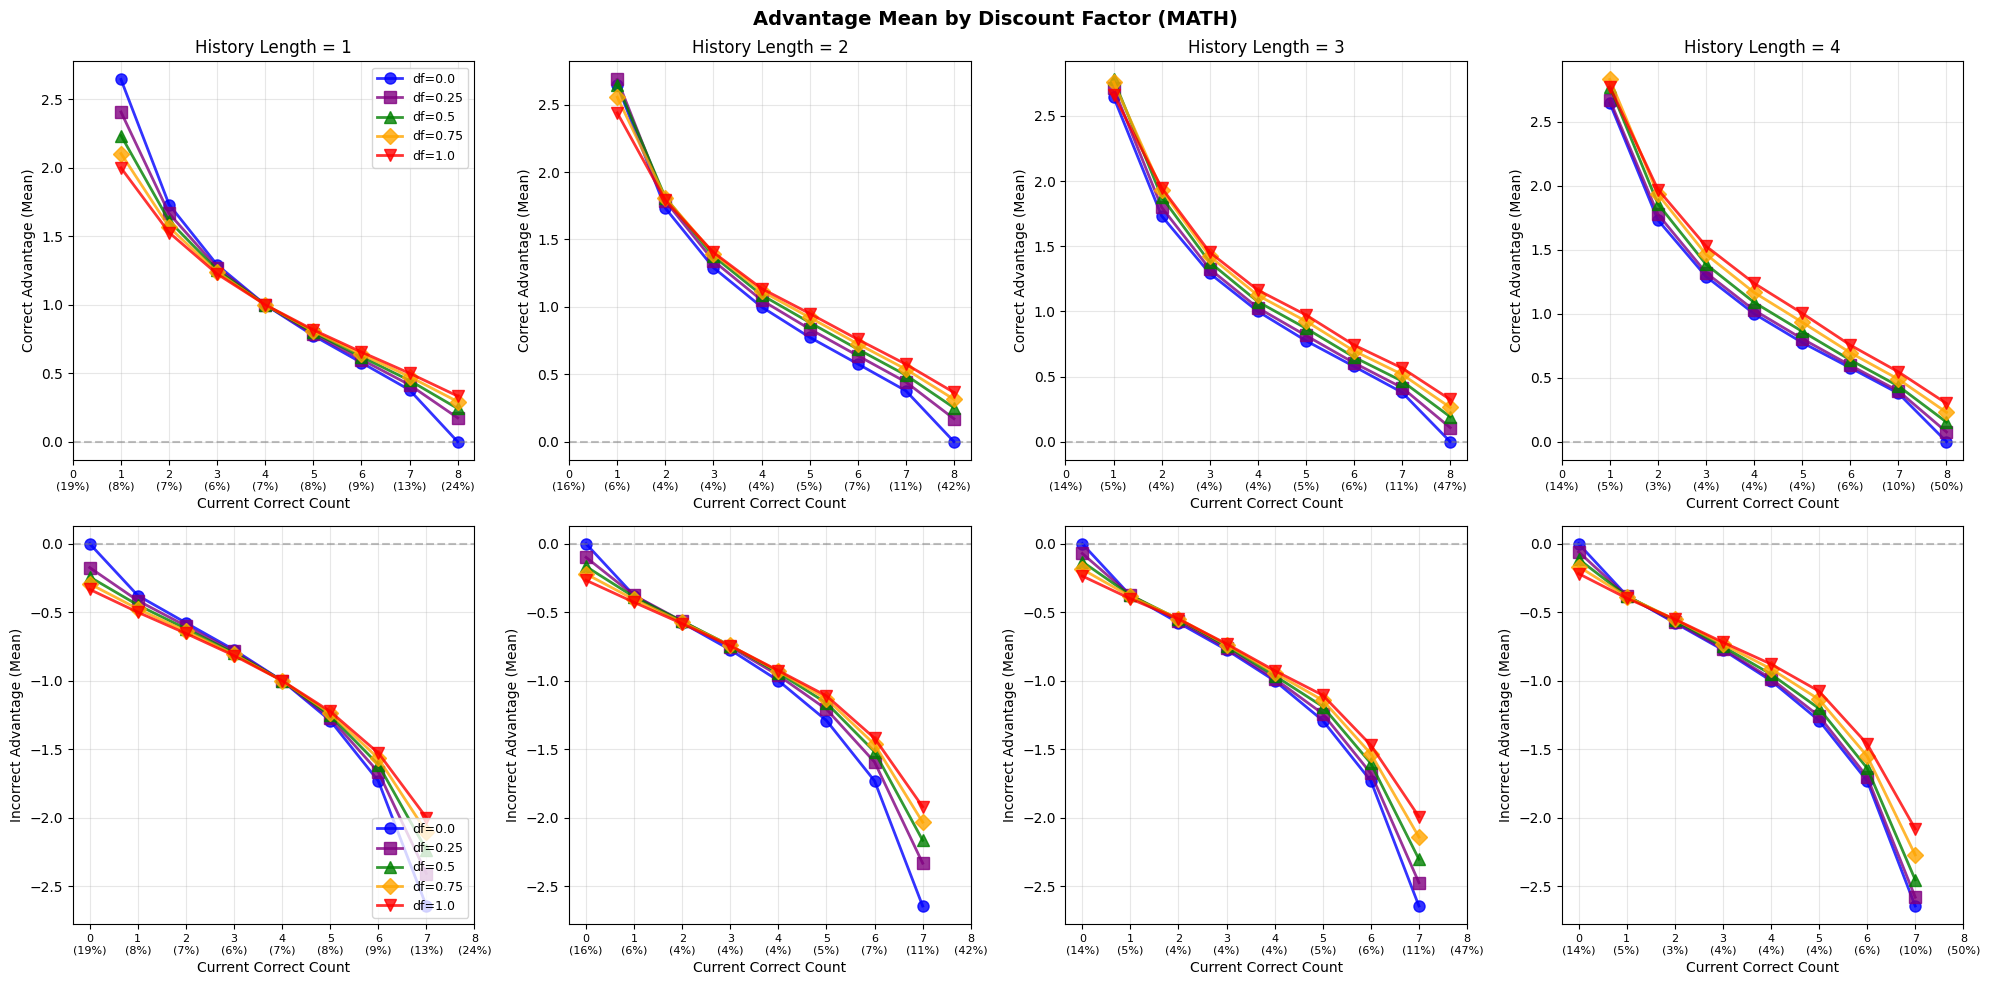


Discount Factor 의미:
  df=0.0 (파랑): GRPO - 현재 case만 사용
  df=0.25~0.75: 중간 단계 - 과거 history 부분 반영
  df=1.0 (빨강): GRPOHist - 전체 history 동등 가중


In [32]:
visualize_discount_factor_sweep(max_history=4, distribution="MATH")

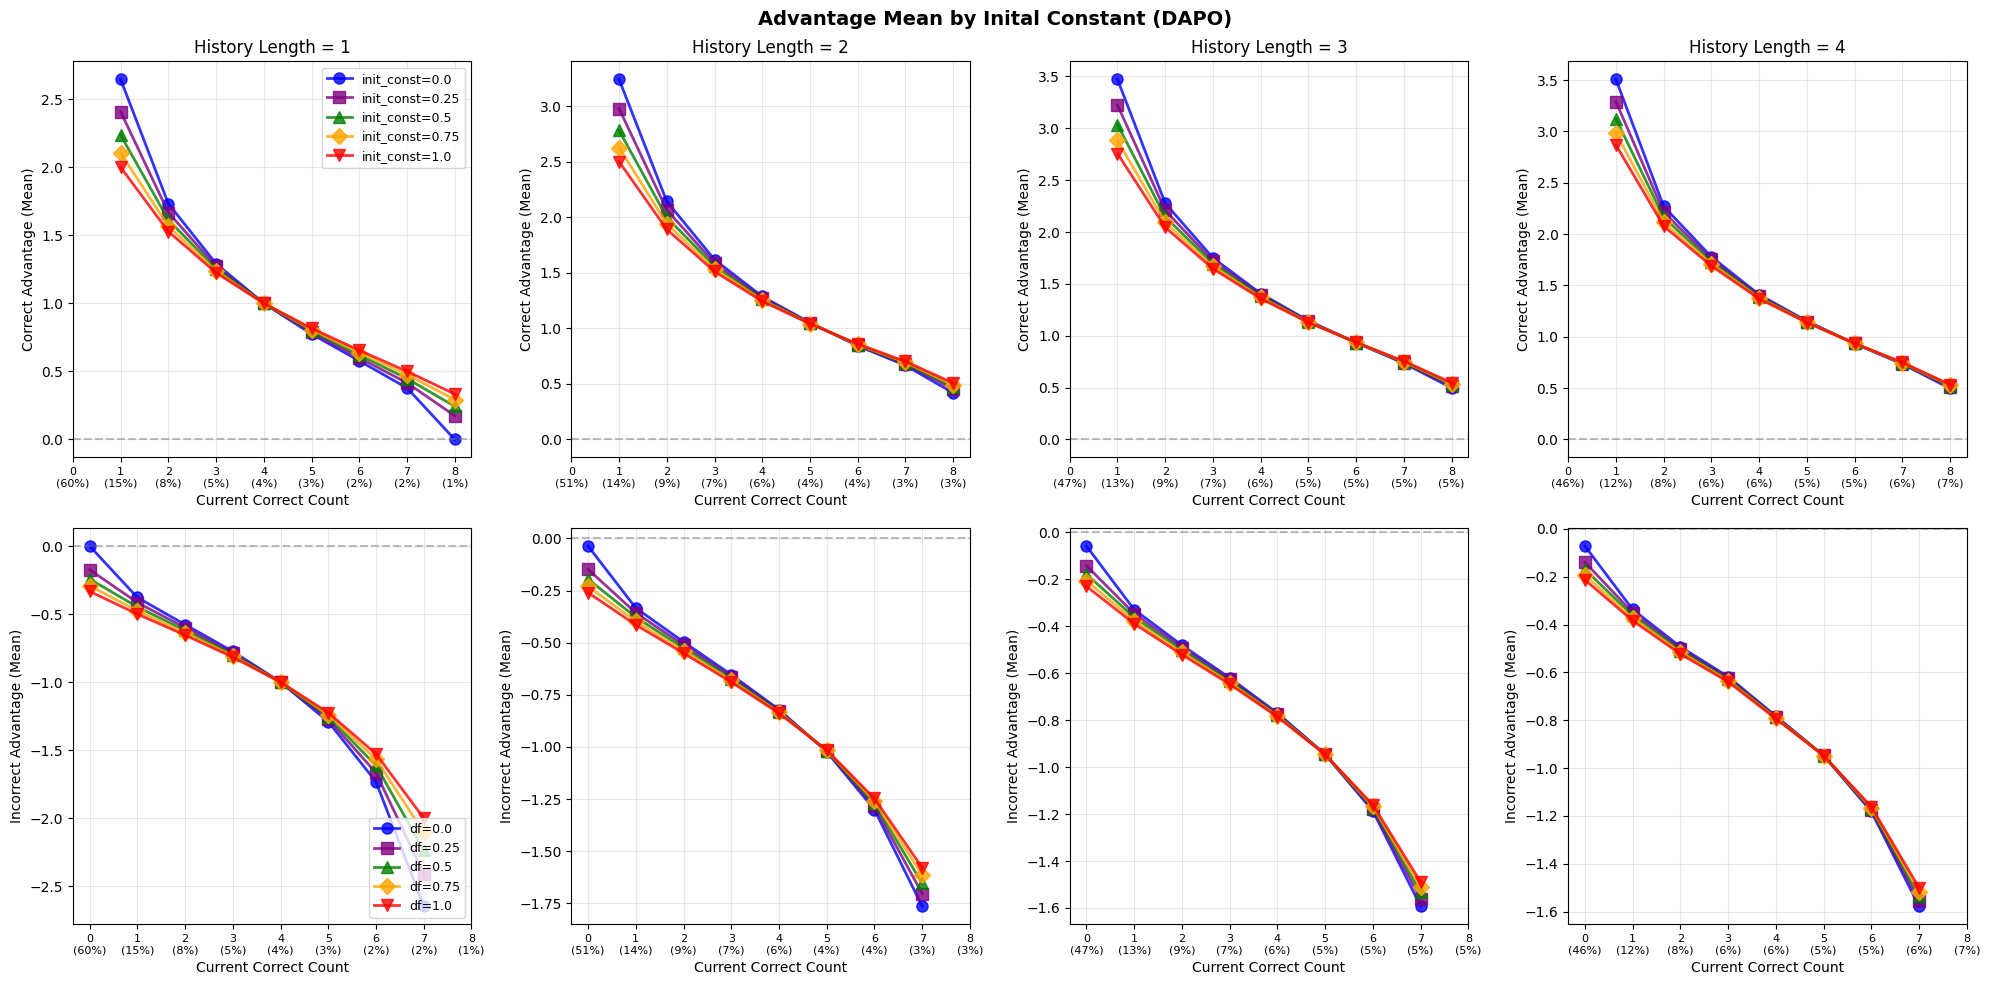

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_init_const_sweep(max_history=4, distribution="grpohistbeta"):
    """
    init_consts에 따른 advantage mean 변화 시각화
    - init_consts: 0.0, 0.25, 0.5, 0.75, 1.0
    """
    init_consts = [0.0, 0.25, 0.5, 0.75, 1.0]
    colors = ['blue', 'purple', 'green', 'orange', 'red']
    markers = ['o', 's', '^', 'D', 'v']
    
    fig, axes = plt.subplots(2, max_history, figsize=(5*max_history, 10))
    fig.suptitle(f'Advantage Mean by Inital Constant ({distribution if distribution != "grpohistbeta" else "DAPO"})', 
                 fontsize=14, fontweight='bold')
    
    id2score = get_id2score(distribution)
    
    for hist_len in range(1, max_history + 1):
        col = hist_len - 1
        cases = id2score_to_cases(id2score, hist_len)
        
        # 비율 계산용
        count_per_current = {i: 0 for i in range(9)}
        for case in cases:
            count_per_current[case[-1]] += 1
        total = sum(count_per_current.values())
        ratios = [count_per_current[i] / total * 100 if total > 0 else 0 for i in range(9)]
        
        # 각 discount factor별 데이터 수집
        all_means_corr = {init_const: {i: [] for i in range(9)} for init_const in init_consts}
        all_means_incorr = {init_const: {i: [] for i in range(9)} for init_const in init_consts}
        
        for case in cases:
            current_val = case[-1]
            for init_const in init_consts:
                adv_corr, adv_incorr = compute_advantage(case, 1.0, init_const)
                if adv_corr is not None:
                    all_means_corr[init_const][current_val].append(adv_corr)
                if adv_incorr is not None:
                    all_means_incorr[init_const][current_val].append(adv_incorr)
        
        # ===== Correct Advantage (상단 행) =====
        ax_corr = axes[0, col]
        
        for idx, init_const in enumerate(init_consts):
            means = []
            x_vals = []
            for x in range(9):
                if all_means_corr[init_const][x]:
                    means.append(np.mean(all_means_corr[init_const][x]))
                    x_vals.append(x)
            
            # 선 + 마커로 표시
            ax_corr.plot(x_vals, means, color=colors[idx], marker=markers[idx], 
                        markersize=8, linewidth=2, alpha=0.8,
                        label=f'init_const={init_const}')
        
        ax_corr.set_xlabel('Current Correct Count')
        ax_corr.set_ylabel('Correct Advantage (Mean)')
        ax_corr.set_title(f'History Length = {hist_len}')
        ax_corr.set_xticks(range(9))
        ax_corr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_corr.grid(True, alpha=0.3)
        if col == 0:
            ax_corr.legend(loc='upper right', fontsize=9)
        
        # x축 라벨에 비율 표시
        ratio_labels = [f'{i}\n({ratios[i]:.0f}%)' for i in range(9)]
        ax_corr.set_xticklabels(ratio_labels, fontsize=8)
        
        # ===== Incorrect Advantage (하단 행) =====
        ax_incorr = axes[1, col]
        
        for idx, df in enumerate(init_consts):
            means = []
            x_vals = []
            for x in range(9):
                if all_means_incorr[df][x]:
                    means.append(np.mean(all_means_incorr[df][x]))
                    x_vals.append(x)
            
            ax_incorr.plot(x_vals, means, color=colors[idx], marker=markers[idx],
                          markersize=8, linewidth=2, alpha=0.8,
                          label=f'df={df}')
        
        ax_incorr.set_xlabel('Current Correct Count')
        ax_incorr.set_ylabel('Incorrect Advantage (Mean)')
        ax_incorr.set_xticks(range(9))
        ax_incorr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_incorr.grid(True, alpha=0.3)
        if col == 0:
            ax_incorr.legend(loc='lower right', fontsize=9)
        
        ax_incorr.set_xticklabels(ratio_labels, fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'init_const_sweep_{distribution}.png', dpi=150, bbox_inches='tight')
    plt.show()
    

# 실행
visualize_init_const_sweep(max_history=4, distribution="grpohistbeta")


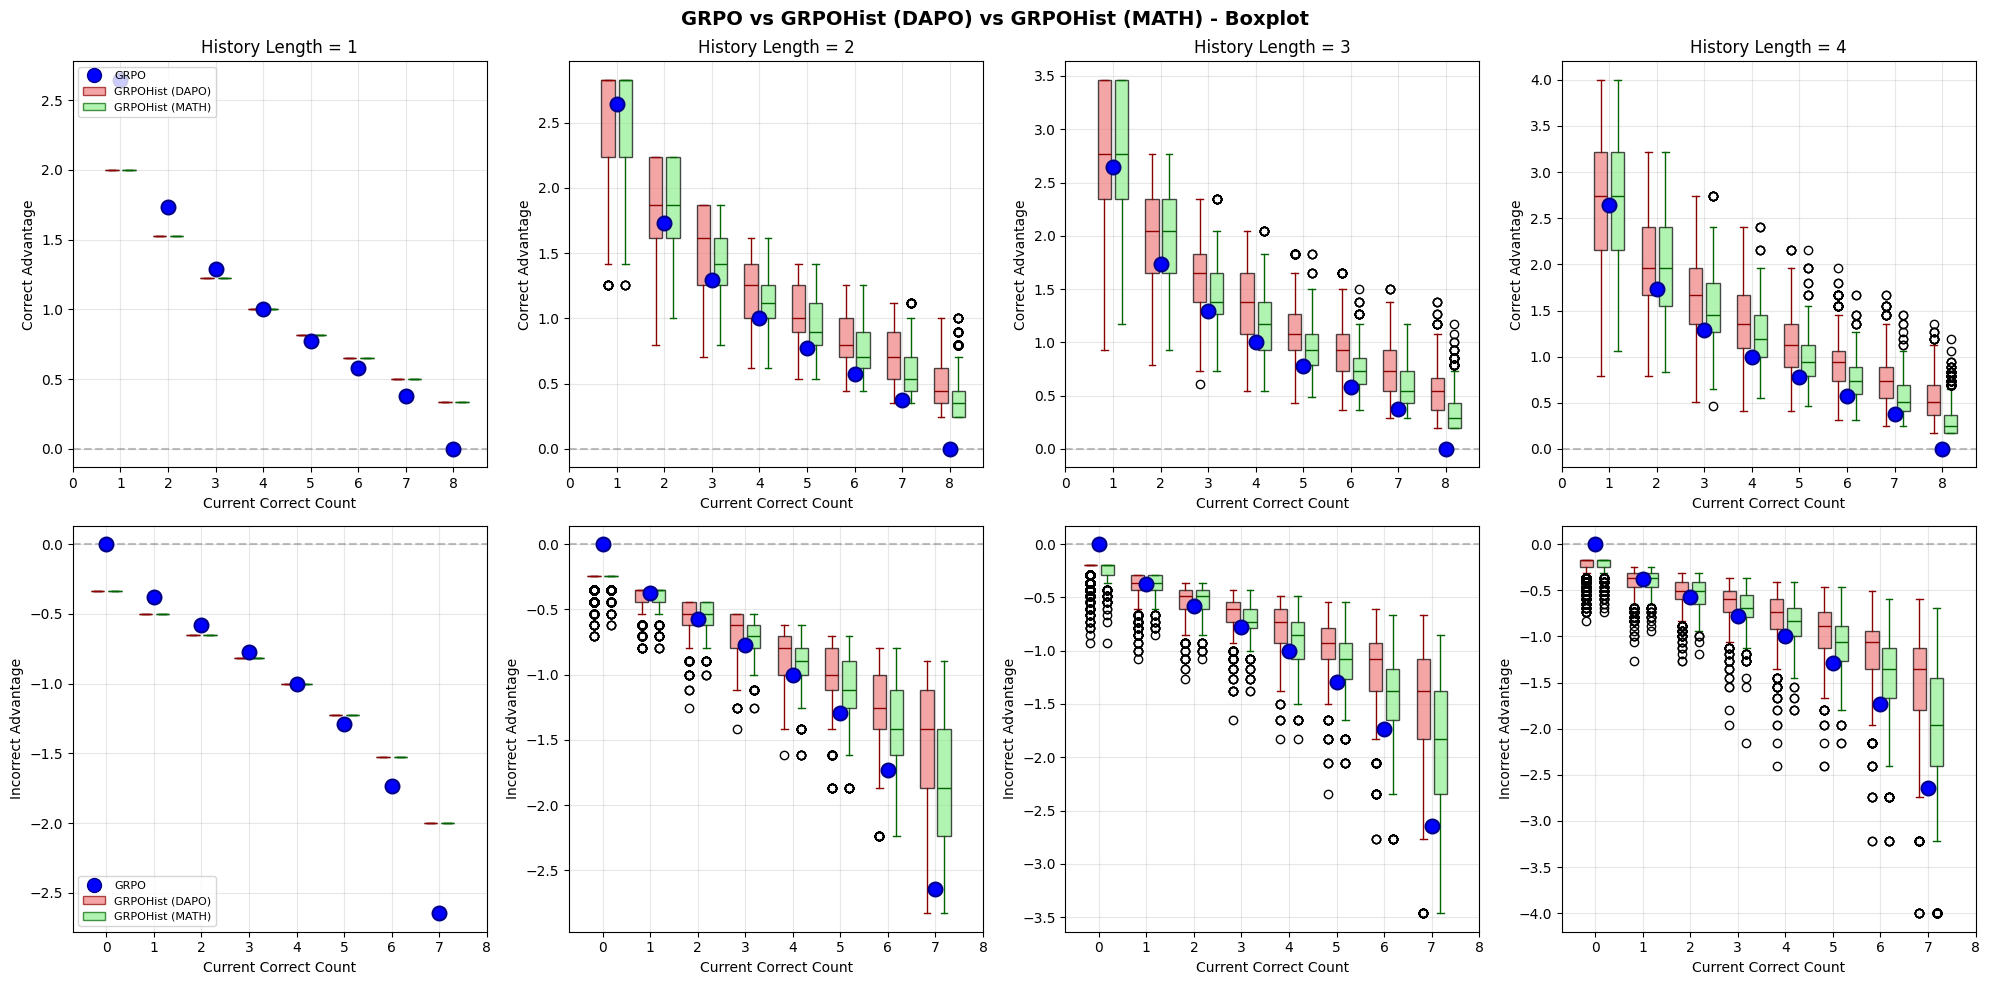

Legend:
  ● Blue circle: GRPO (only uses current case)
  Red box: GRPOHist (DAPO) distribution
  Green box: GRPOHist (MATH) distribution


In [20]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_advantage_comparison_boxplot(max_history=4):
    """
    GRPO vs GRPOHist (DAPO) vs GRPOHist (MATH) - Boxplot 버전
    """
    fig, axes = plt.subplots(2, max_history, figsize=(5*max_history, 10))
    fig.suptitle('GRPO vs GRPOHist (DAPO) vs GRPOHist (MATH) - Boxplot', fontsize=14, fontweight='bold')
    
    for hist_len in range(1, max_history + 1):
        col = hist_len - 1
        
        # 데이터셋 로드
        id2score_dapo = get_id2score("grpohistbeta")
        id2score_math = get_id2score("MATH")
        
        cases_dapo = id2score_to_cases(id2score_dapo, hist_len)
        cases_math = id2score_to_cases(id2score_math, hist_len)
        
        # 데이터 수집
        grpo_correct, grpo_incorrect = {i: None for i in range(9)}, {i: None for i in range(9)}
        dapo_correct, dapo_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        math_correct, math_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        
        # GRPO theoretical values
        for current_val in range(9):
            dummy_case = np.array([current_val])
            adv_corr, adv_incorr = compute_advantage(dummy_case, 0)
            grpo_correct[current_val] = adv_corr
            grpo_incorrect[current_val] = adv_incorr
        
        # GRPOHist DAPO
        for case in cases_dapo:
            current_val = case[-1]
            adv_corr, adv_incorr = compute_advantage(case, 1)
            if adv_corr is not None:
                dapo_correct[current_val].append(adv_corr)
            if adv_incorr is not None:
                dapo_incorrect[current_val].append(adv_incorr)
        
        # GRPOHist MATH
        for case in cases_math:
            current_val = case[-1]
            adv_corr, adv_incorr = compute_advantage(case, 1)
            if adv_corr is not None:
                math_correct[current_val].append(adv_corr)
            if adv_incorr is not None:
                math_incorrect[current_val].append(adv_incorr)
        
        # ===== Correct Advantage (상단 행) =====
        ax_corr = axes[0, col]
        
        # Boxplot 데이터 준비 (간격 넓힘)
        positions_dapo = [x - 0.18 for x in range(9)]
        positions_math = [x + 0.18 for x in range(9)]
        box_width = 0.28
        
        # DAPO boxplot (빨간색)
        dapo_data = [dapo_correct[x] if dapo_correct[x] else [np.nan] for x in range(9)]
        bp_dapo = ax_corr.boxplot(dapo_data, positions=positions_dapo, widths=box_width,
                                   patch_artist=True, manage_ticks=False)
        for patch in bp_dapo['boxes']:
            patch.set_facecolor('lightcoral')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_dapo[element], color='darkred')
        
        # MATH boxplot (초록색)
        math_data = [math_correct[x] if math_correct[x] else [np.nan] for x in range(9)]
        bp_math = ax_corr.boxplot(math_data, positions=positions_math, widths=box_width,
                                   patch_artist=True, manage_ticks=False)
        for patch in bp_math['boxes']:
            patch.set_facecolor('lightgreen')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_math[element], color='darkgreen')
        
        # GRPO scatter (파란 원)
        for x in range(9):
            if grpo_correct[x] is not None:
                ax_corr.scatter([x], [grpo_correct[x]], c='blue', s=100, marker='o', 
                               zorder=5, edgecolors='darkblue', linewidths=1.5,
                               label='GRPO' if x == 1 else '')
        
        ax_corr.set_xlabel('Current Correct Count')
        ax_corr.set_ylabel('Correct Advantage')
        ax_corr.set_title(f'History Length = {hist_len}')
        ax_corr.set_xticks(range(9))
        ax_corr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_corr.grid(True, alpha=0.3)
        
        # 범례
        if col == 0:
            from matplotlib.patches import Patch
            legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                          markeredgecolor='darkblue', markersize=10, label='GRPO'),
                Patch(facecolor='lightcoral', edgecolor='darkred', alpha=0.7, label='GRPOHist (DAPO)'),
                Patch(facecolor='lightgreen', edgecolor='darkgreen', alpha=0.7, label='GRPOHist (MATH)')
            ]
            ax_corr.legend(handles=legend_elements, loc='upper left', fontsize=8)
        
        # ===== Incorrect Advantage (하단 행) =====
        ax_incorr = axes[1, col]
        
        # DAPO boxplot
        dapo_data_incorr = [dapo_incorrect[x] if dapo_incorrect[x] else [np.nan] for x in range(9)]
        bp_dapo_incorr = ax_incorr.boxplot(dapo_data_incorr, positions=positions_dapo, widths=box_width,
                                            patch_artist=True, manage_ticks=False)
        for patch in bp_dapo_incorr['boxes']:
            patch.set_facecolor('lightcoral')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_dapo_incorr[element], color='darkred')
        
        # MATH boxplot
        math_data_incorr = [math_incorrect[x] if math_incorrect[x] else [np.nan] for x in range(9)]
        bp_math_incorr = ax_incorr.boxplot(math_data_incorr, positions=positions_math, widths=box_width,
                                            patch_artist=True, manage_ticks=False)
        for patch in bp_math_incorr['boxes']:
            patch.set_facecolor('lightgreen')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_math_incorr[element], color='darkgreen')
        
        # GRPO scatter
        for x in range(9):
            if grpo_incorrect[x] is not None:
                ax_incorr.scatter([x], [grpo_incorrect[x]], c='blue', s=100, marker='o',
                                 zorder=5, edgecolors='darkblue', linewidths=1.5)
        
        ax_incorr.set_xlabel('Current Correct Count')
        ax_incorr.set_ylabel('Incorrect Advantage')
        ax_incorr.set_xticks(range(9))
        ax_incorr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_incorr.grid(True, alpha=0.3)
        
        if col == 0:
            ax_incorr.legend(handles=legend_elements, loc='lower left', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('advantage_comparison_boxplot.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("Legend:")
    print("  ● Blue circle: GRPO (only uses current case)")
    print("  Red box: GRPOHist (DAPO) distribution")
    print("  Green box: GRPOHist (MATH) distribution")

# 실행
visualize_advantage_comparison_boxplot(max_history=4)


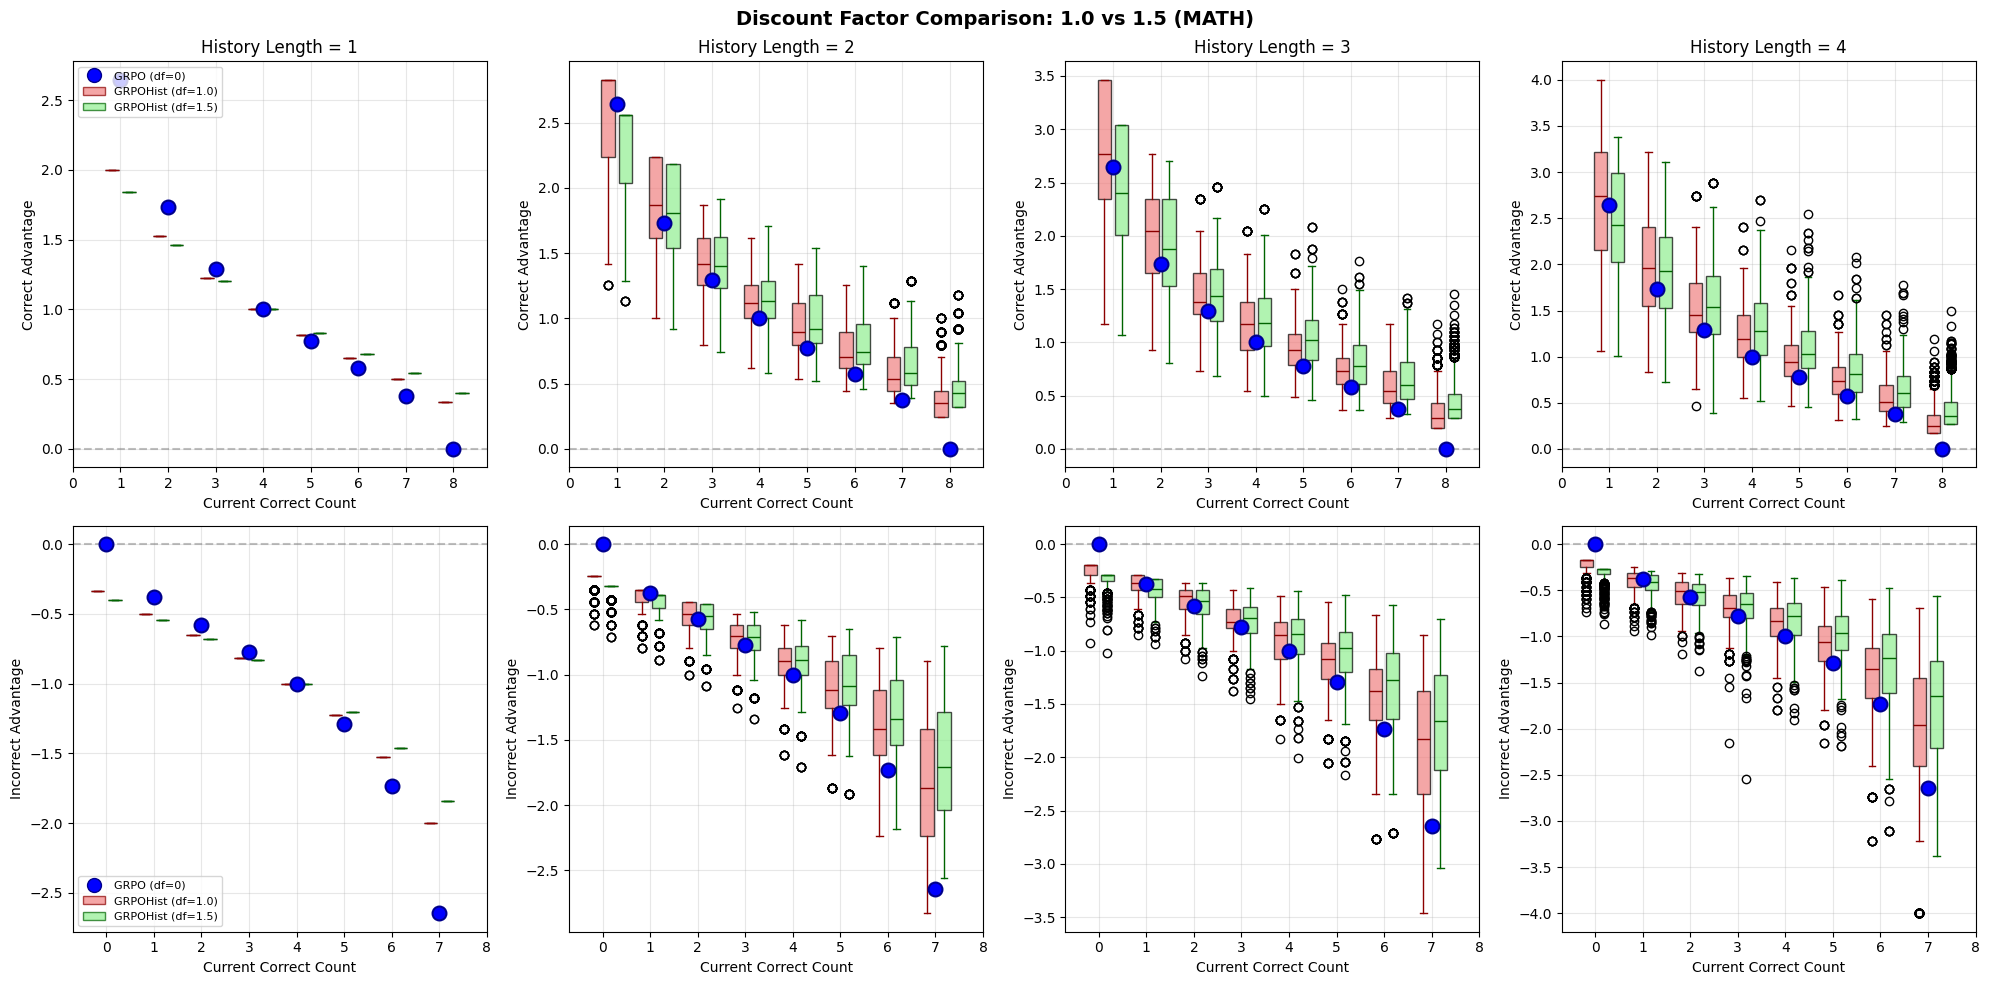

Legend:
  ● Blue circle: GRPO (discount_factor=0, only current)
  Red box: GRPOHist (discount_factor=1.0)
  Green box: GRPOHist (discount_factor=1.5)


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_discount_factor_comparison(max_history=4, exp="MATH"):
    """
    Discount Factor 비교: 1.0 vs 1.5
    - GRPO: discount_factor=0 (파란색 원)
    - GRPOHist df=1.0: (빨간색 박스)
    - GRPOHist df=1.5: (초록색 박스)
    """
    fig, axes = plt.subplots(2, max_history, figsize=(5*max_history, 10))
    fig.suptitle(f'Discount Factor Comparison: 1.0 vs 1.5 ({exp})', fontsize=14, fontweight='bold')
    
    id2score = get_id2score(exp)
    
    for hist_len in range(1, max_history + 1):
        col = hist_len - 1
        
        cases = id2score_to_cases(id2score, hist_len)
        
        # 데이터 수집
        grpo_correct, grpo_incorrect = {i: None for i in range(9)}, {i: None for i in range(9)}
        df1_correct, df1_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        df15_correct, df15_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        
        # GRPO theoretical values (discount_factor=0)
        for current_val in range(9):
            dummy_case = np.array([current_val])
            adv_corr, adv_incorr = compute_advantage(dummy_case, 0)
            grpo_correct[current_val] = adv_corr
            grpo_incorrect[current_val] = adv_incorr
        
        # GRPOHist with discount_factor=1.0
        for case in cases:
            current_val = case[-1]
            adv_corr, adv_incorr = compute_advantage(case, 1.0)
            if adv_corr is not None:
                df1_correct[current_val].append(adv_corr)
            if adv_incorr is not None:
                df1_incorrect[current_val].append(adv_incorr)
        
        # GRPOHist with discount_factor=1.5
        for case in cases:
            current_val = case[-1]
            adv_corr, adv_incorr = compute_advantage(case, 1.5)
            if adv_corr is not None:
                df15_correct[current_val].append(adv_corr)
            if adv_incorr is not None:
                df15_incorrect[current_val].append(adv_incorr)
        
        # ===== Correct Advantage (상단 행) =====
        ax_corr = axes[0, col]
        
        # Boxplot 데이터 준비
        positions_df1 = [x - 0.18 for x in range(9)]
        positions_df15 = [x + 0.18 for x in range(9)]
        box_width = 0.28
        
        # df=1.0 boxplot (빨간색)
        df1_data = [df1_correct[x] if df1_correct[x] else [np.nan] for x in range(9)]
        bp_df1 = ax_corr.boxplot(df1_data, positions=positions_df1, widths=box_width,
                                  patch_artist=True, manage_ticks=False)
        for patch in bp_df1['boxes']:
            patch.set_facecolor('lightcoral')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_df1[element], color='darkred')
        
        # df=1.5 boxplot (초록색)
        df15_data = [df15_correct[x] if df15_correct[x] else [np.nan] for x in range(9)]
        bp_df15 = ax_corr.boxplot(df15_data, positions=positions_df15, widths=box_width,
                                   patch_artist=True, manage_ticks=False)
        for patch in bp_df15['boxes']:
            patch.set_facecolor('lightgreen')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_df15[element], color='darkgreen')
        
        # GRPO scatter (파란 원)
        for x in range(9):
            if grpo_correct[x] is not None:
                ax_corr.scatter([x], [grpo_correct[x]], c='blue', s=100, marker='o', 
                               zorder=5, edgecolors='darkblue', linewidths=1.5,
                               label='GRPO (df=0)' if x == 1 else '')
        
        ax_corr.set_xlabel('Current Correct Count')
        ax_corr.set_ylabel('Correct Advantage')
        ax_corr.set_title(f'History Length = {hist_len}')
        ax_corr.set_xticks(range(9))
        ax_corr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_corr.grid(True, alpha=0.3)
        
        # 범례
        if col == 0:
            from matplotlib.patches import Patch
            legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                          markeredgecolor='darkblue', markersize=10, label='GRPO (df=0)'),
                Patch(facecolor='lightcoral', edgecolor='darkred', alpha=0.7, label='GRPOHist (df=1.0)'),
                Patch(facecolor='lightgreen', edgecolor='darkgreen', alpha=0.7, label='GRPOHist (df=1.5)')
            ]
            ax_corr.legend(handles=legend_elements, loc='upper left', fontsize=8)
        
        # ===== Incorrect Advantage (하단 행) =====
        ax_incorr = axes[1, col]
        
        # df=1.0 boxplot
        df1_data_incorr = [df1_incorrect[x] if df1_incorrect[x] else [np.nan] for x in range(9)]
        bp_df1_incorr = ax_incorr.boxplot(df1_data_incorr, positions=positions_df1, widths=box_width,
                                           patch_artist=True, manage_ticks=False)
        for patch in bp_df1_incorr['boxes']:
            patch.set_facecolor('lightcoral')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_df1_incorr[element], color='darkred')
        
        # df=1.5 boxplot
        df15_data_incorr = [df15_incorrect[x] if df15_incorrect[x] else [np.nan] for x in range(9)]
        bp_df15_incorr = ax_incorr.boxplot(df15_data_incorr, positions=positions_df15, widths=box_width,
                                            patch_artist=True, manage_ticks=False)
        for patch in bp_df15_incorr['boxes']:
            patch.set_facecolor('lightgreen')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_df15_incorr[element], color='darkgreen')
        
        # GRPO scatter
        for x in range(9):
            if grpo_incorrect[x] is not None:
                ax_incorr.scatter([x], [grpo_incorrect[x]], c='blue', s=100, marker='o',
                                 zorder=5, edgecolors='darkblue', linewidths=1.5)
        
        ax_incorr.set_xlabel('Current Correct Count')
        ax_incorr.set_ylabel('Incorrect Advantage')
        ax_incorr.set_xticks(range(9))
        ax_incorr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_incorr.grid(True, alpha=0.3)
        
        if col == 0:
            ax_incorr.legend(handles=legend_elements, loc='lower left', fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'discount_factor_comparison_{exp}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("Legend:")
    print("  ● Blue circle: GRPO (discount_factor=0, only current)")
    print("  Red box: GRPOHist (discount_factor=1.0)")
    print("  Green box: GRPOHist (discount_factor=1.5)")

# 실행
visualize_discount_factor_comparison(max_history=4, exp="MATH")


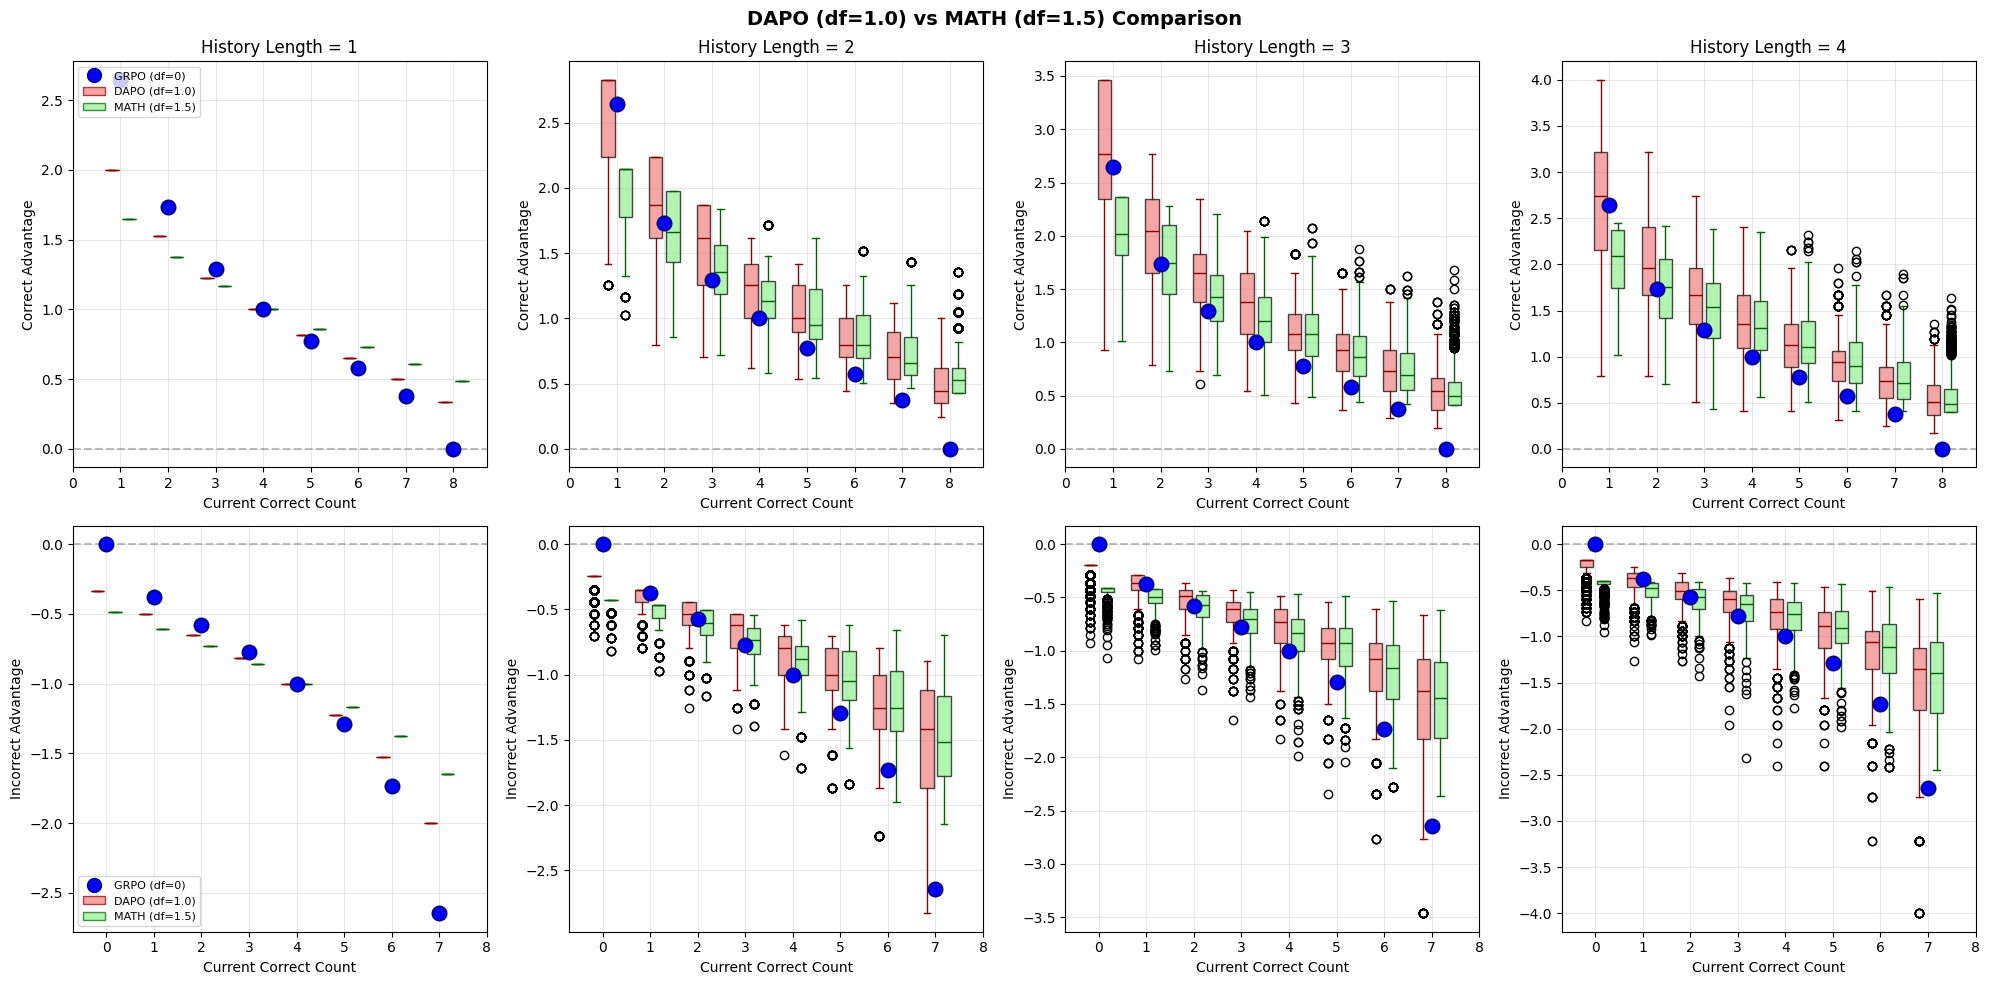

Legend:
  ● Blue circle: GRPO (discount_factor=0, only current)
  Red box: DAPO (discount_factor=1.0)
  Green box: MATH (discount_factor=1.5)


In [54]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_math_vs_dapo(max_history=4):
    """
    MATH (df=1.5) vs DAPO (df=1.0) 비교
    - GRPO: discount_factor=0 (파란색 원)
    - DAPO df=1.0: (빨간색 박스)
    - MATH df=1.5: (초록색 박스)
    """
    fig, axes = plt.subplots(2, max_history, figsize=(5*max_history, 10))
    fig.suptitle('DAPO (df=1.0) vs MATH (df=1.5) Comparison', fontsize=14, fontweight='bold')
    
    id2score_dapo = get_id2score("grpohistbeta")
    id2score_math = get_id2score("MATH")
    
    for hist_len in range(1, max_history + 1):
        col = hist_len - 1
        
        cases_dapo = id2score_to_cases(id2score_dapo, hist_len)
        cases_math = id2score_to_cases(id2score_math, hist_len)
        
        # 데이터 수집
        grpo_correct, grpo_incorrect = {i: None for i in range(9)}, {i: None for i in range(9)}
        dapo_correct, dapo_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        math_correct, math_incorrect = {i: [] for i in range(9)}, {i: [] for i in range(9)}
        
        # GRPO theoretical values (discount_factor=0)
        for current_val in range(9):
            dummy_case = np.array([current_val])
            adv_corr, adv_incorr = compute_advantage(dummy_case, 0)
            grpo_correct[current_val] = adv_corr
            grpo_incorrect[current_val] = adv_incorr
        
        # DAPO with discount_factor=1.0
        for case in cases_dapo:
            current_val = case[-1]
            adv_corr, adv_incorr = compute_advantage(case, 1.0)
            if adv_corr is not None:
                dapo_correct[current_val].append(adv_corr)
            if adv_incorr is not None:
                dapo_incorrect[current_val].append(adv_incorr)
        
        # MATH with discount_factor=1.5
        for case in cases_math:
            current_val = case[-1]
            adv_corr, adv_incorr = compute_advantage(case, 2.5)
            if adv_corr is not None:
                math_correct[current_val].append(adv_corr)
            if adv_incorr is not None:
                math_incorrect[current_val].append(adv_incorr)
        
        # ===== Correct Advantage (상단 행) =====
        ax_corr = axes[0, col]
        
        # Boxplot 데이터 준비
        positions_dapo = [x - 0.18 for x in range(9)]
        positions_math = [x + 0.18 for x in range(9)]
        box_width = 0.28
        
        # DAPO df=1.0 boxplot (빨간색)
        dapo_data = [dapo_correct[x] if dapo_correct[x] else [np.nan] for x in range(9)]
        bp_dapo = ax_corr.boxplot(dapo_data, positions=positions_dapo, widths=box_width,
                                   patch_artist=True, manage_ticks=False)
        for patch in bp_dapo['boxes']:
            patch.set_facecolor('lightcoral')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_dapo[element], color='darkred')
        
        # MATH df=1.5 boxplot (초록색)
        math_data = [math_correct[x] if math_correct[x] else [np.nan] for x in range(9)]
        bp_math = ax_corr.boxplot(math_data, positions=positions_math, widths=box_width,
                                   patch_artist=True, manage_ticks=False)
        for patch in bp_math['boxes']:
            patch.set_facecolor('lightgreen')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_math[element], color='darkgreen')
        
        # GRPO scatter (파란 원)
        for x in range(9):
            if grpo_correct[x] is not None:
                ax_corr.scatter([x], [grpo_correct[x]], c='blue', s=100, marker='o', 
                               zorder=5, edgecolors='darkblue', linewidths=1.5,
                               label='GRPO (df=0)' if x == 1 else '')
        
        ax_corr.set_xlabel('Current Correct Count')
        ax_corr.set_ylabel('Correct Advantage')
        ax_corr.set_title(f'History Length = {hist_len}')
        ax_corr.set_xticks(range(9))
        ax_corr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_corr.grid(True, alpha=0.3)
        
        # 범례
        if col == 0:
            from matplotlib.patches import Patch
            legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                          markeredgecolor='darkblue', markersize=10, label='GRPO (df=0)'),
                Patch(facecolor='lightcoral', edgecolor='darkred', alpha=0.7, label='DAPO (df=1.0)'),
                Patch(facecolor='lightgreen', edgecolor='darkgreen', alpha=0.7, label='MATH (df=1.5)')
            ]
            ax_corr.legend(handles=legend_elements, loc='upper left', fontsize=8)
        
        # ===== Incorrect Advantage (하단 행) =====
        ax_incorr = axes[1, col]
        
        # DAPO df=1.0 boxplot
        dapo_data_incorr = [dapo_incorrect[x] if dapo_incorrect[x] else [np.nan] for x in range(9)]
        bp_dapo_incorr = ax_incorr.boxplot(dapo_data_incorr, positions=positions_dapo, widths=box_width,
                                            patch_artist=True, manage_ticks=False)
        for patch in bp_dapo_incorr['boxes']:
            patch.set_facecolor('lightcoral')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_dapo_incorr[element], color='darkred')
        
        # MATH df=1.5 boxplot
        math_data_incorr = [math_incorrect[x] if math_incorrect[x] else [np.nan] for x in range(9)]
        bp_math_incorr = ax_incorr.boxplot(math_data_incorr, positions=positions_math, widths=box_width,
                                            patch_artist=True, manage_ticks=False)
        for patch in bp_math_incorr['boxes']:
            patch.set_facecolor('lightgreen')
            patch.set_alpha(0.7)
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp_math_incorr[element], color='darkgreen')
        
        # GRPO scatter
        for x in range(9):
            if grpo_incorrect[x] is not None:
                ax_incorr.scatter([x], [grpo_incorrect[x]], c='blue', s=100, marker='o',
                                 zorder=5, edgecolors='darkblue', linewidths=1.5)
        
        ax_incorr.set_xlabel('Current Correct Count')
        ax_incorr.set_ylabel('Incorrect Advantage')
        ax_incorr.set_xticks(range(9))
        ax_incorr.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax_incorr.grid(True, alpha=0.3)
        
        if col == 0:
            ax_incorr.legend(handles=legend_elements, loc='lower left', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('dapo_vs_math_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("Legend:")
    print("  ● Blue circle: GRPO (discount_factor=0, only current)")
    print("  Red box: DAPO (discount_factor=1.0)")
    print("  Green box: MATH (discount_factor=1.5)")

# 실행
visualize_math_vs_dapo(max_history=4)
